In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)

# Data Preprocessing

In [2]:
df=pd.read_csv('E:\personal\python\PROJECT-techno\Bondora_raw.csv',low_memory=False)
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

In [3]:
df.shape

(134529, 112)

In [4]:
# missing_count=df.DefaultDate.count()
# print(missing_count)

In [5]:
# value counts of columns
for i in df:
    print(i,df[i].isnull().sum())

ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 75546
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 45
LanguageCode 0
Age 0
DateOfBirth 0
Gender 45
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6685
County 36840
City 9794
UseOfLoan 0
Education 45
MaritalStatus 45
NrOfDependants 98929
EmploymentStatus 197
EmploymentDurationCurrentEmployer 876
EmploymentPosition 98439
WorkExperience 98007
OccupationArea 86
HomeOwnershipType 1652
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 45
FreeCash 45
MonthlyPaymentDay 0
ActiveSc

In [6]:
# removing the columns having more than 40% missing values
missing_values=[]
for i in df.columns:
    if df[i].isnull().sum() >= (40*134529)/100:
        missing_values.append(i)
missing_values.remove("DefaultDate")

In [7]:
miss_col=missing_values

In [8]:
df1=df.drop(miss_col,axis=1)

In [9]:
df1.shape

(134529, 77)

In [10]:
del_col=['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [11]:
df1.drop(df1[df1['Age']<18].index,inplace=True)

In [12]:
#removing unnecessary columns
df1.drop(del_col,axis=1,inplace=True)

In [13]:
df1.shape

(134476, 49)

In [14]:
df1.Status.value_counts()

Current    57135
Late       45772
Repaid     31569
Name: Status, dtype: int64

In [15]:
date_cols=['LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn']
df1=df1.drop(date_cols,axis=1)

In [16]:
# filtering out Current Status records
df1=df1[df1.Status!='Current']

In [17]:
df1.Status.value_counts()

Late      45772
Repaid    31569
Name: Status, dtype: int64

In [18]:
df1['DefaultStatus']=df1['DefaultDate'].fillna(0)
df1['DefaultStatus'][df1['DefaultStatus']!=0]=1

In [19]:
df1.DefaultStatus.value_counts()

1    42767
0    34574
Name: DefaultStatus, dtype: int64

In [20]:
df1.DefaultStatus.astype(int)

0         0
1         0
2         1
3         0
4         1
         ..
134524    1
134525    0
134526    1
134527    1
134528    1
Name: DefaultStatus, Length: 77341, dtype: int32

In [21]:
df1['DefaultStatus'] = pd.to_numeric(df1['DefaultStatus'])

In [22]:
df1.Education.value_counts()

 4.0    28557
 5.0    20919
 3.0    17257
 2.0     5379
 1.0     5226
-1.0        3
Name: Education, dtype: int64

In [23]:
df1.loc[df1['Education']==1,"Education"]="Primary"
df1.loc[df1['Education']==2,"Education"]="Basic"
df1.loc[df1['Education']==3,"Education"]="Vocational"
df1.loc[df1['Education']==4,"Education"]="Secondary"
df1.loc[df1['Education']==5,"Education"]="Higher"
df1.loc[df1['Education'] == -1.0,"Education"] = 'Not_present'
df1.loc[df1['Education'] == 0.0,"Education"] = 'Not_present'

In [24]:
df1.VerificationType.value_counts()

4.0    41428
1.0    25626
3.0     8460
2.0     1827
Name: VerificationType, dtype: int64

In [25]:
df1.loc[df1['VerificationType'] == 0.0,'VerificationType'] = 'Not_set'
df1.loc[df1['VerificationType'] == 1.0,'VerificationType'] = 'Income_unverified'
df1.loc[df1['VerificationType'] == 2.0,'VerificationType'] = 'Income_unverified_crossref_by_phone'
df1.loc[df1['VerificationType'] == 3.0,'VerificationType'] = 'Income_verified'
df1.loc[df1['VerificationType'] == 4.0,'VerificationType'] = 'Income_and_expenses_verified'

In [26]:
df1.Gender.value_counts()

0.0    50689
1.0    20927
2.0     5725
Name: Gender, dtype: int64

In [27]:
df1.loc[df1['Gender'] == 0.0,'Gender'] = 'Male'
df1.loc[df1['Gender'] == 1.0,'Gender']= 'Female'
df1.loc[df1['Gender'] == 2.0,'Gender'] = 'Unknown'

In [28]:
df1.LanguageCode.value_counts()

1     33187
4     20302
6     16407
3      6534
2       602
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [29]:
df1.loc[df1['LanguageCode'] == 1,'LanguageCode'] = 'Estonian'
df1.loc[df1['LanguageCode'] == 2,'LanguageCode'] = 'English'
df1.loc[df1['LanguageCode'] == 3,'LanguageCode'] = 'Russian'
df1.loc[df1['LanguageCode'] == 4,'LanguageCode'] = 'Finnish'
df1.loc[df1['LanguageCode'] == 5,'LanguageCode'] = 'German'
df1.loc[df1['LanguageCode'] == 6,'LanguageCode'] = 'Spanish'
df1.loc[df1['LanguageCode'] == 9,'LanguageCode'] = 'Slovakian'
df1.loc[df1['LanguageCode'] == 7,'LanguageCode'] = 'Others'
df1.loc[df1['LanguageCode'] == 21,'LanguageCode'] = 'Others'
df1.loc[df1['LanguageCode'] == 22,'LanguageCode'] = 'Others'
df1.loc[df1['LanguageCode'] == 15,'LanguageCode'] = 'Others'
df1.loc[df1['LanguageCode'] == 13,'LanguageCode'] = 'Others'
df1.loc[df1['LanguageCode'] == 10,'LanguageCode'] = 'Others'

In [30]:
df1.UseOfLoan.value_counts()

-1    44177
 7     8926
 2     8102
 0     6419
 6     2884
 3     1743
 5     1621
 8     1367
 4     1259
 1      843
Name: UseOfLoan, dtype: int64

In [31]:
df1.loc[df1['UseOfLoan'] == -1,'UseOfLoan'] = 'Not_set'
df1.loc[df1['UseOfLoan'] == 0,'UseOfLoan'] = 'Loan_consolidation'
df1.loc[df1['UseOfLoan'] == 1,'UseOfLoan'] = 'Real_estate'
df1.loc[df1['UseOfLoan'] == 2,'UseOfLoan'] = 'Home_improvement'
df1.loc[df1['UseOfLoan'] == 3,'UseOfLoan'] = 'Business'
df1.loc[df1['UseOfLoan'] == 4,'UseOfLoan'] = 'Education'
df1.loc[df1['UseOfLoan'] == 5,'UseOfLoan'] = 'Travel'
df1.loc[df1['UseOfLoan'] == 6,'UseOfLoan'] = 'Vehicle'
df1.loc[df1['UseOfLoan'] == 7,'UseOfLoan'] = 'Other'
df1.loc[df1['UseOfLoan'] == 8,'UseOfLoan'] = 'Health'
df1.loc[df1['UseOfLoan'] == 101,'UseOfLoan'] = 'Working_capital_financing'
df1.loc[df1['UseOfLoan'] == 102,'UseOfLoan'] = 'Purchase_of_machinery_equipment'
df1.loc[df1['UseOfLoan'] == 104,'UseOfLoan'] = 'Accounts_receivable_financing'
df1.loc[df1['UseOfLoan'] == 106,'UseOfLoan'] = 'Construction_finance'
df1.loc[df1['UseOfLoan'] == 107,'UseOfLoan'] = 'Acquisition_of_stocks'
df1.loc[df1['UseOfLoan'] == 108,'UseOfLoan'] = 'Acquisition_of_real_estate'
df1.loc[df1['UseOfLoan'] == 110,'UseOfLoan'] = 'Other_business'

In [32]:
df1.MaritalStatus.value_counts()

-1.0    44177
 3.0    11504
 1.0     9585
 2.0     8479
 4.0     3077
 5.0      519
Name: MaritalStatus, dtype: int64

In [33]:
df1.loc[df1['MaritalStatus']==-1,"MaritalStatus"]="Not_specified"
df1.loc[df1['MaritalStatus']==0,"MaritalStatus"]="Not_specified"
df1.loc[df1['MaritalStatus']==1,"MaritalStatus"]="Married"
df1.loc[df1['MaritalStatus']==2,"MaritalStatus"]="Cohabitant"
df1.loc[df1['MaritalStatus']==3,"MaritalStatus"]="Single"
df1.loc[df1['MaritalStatus']==4,"MaritalStatus"]="Divorced"
df1.loc[df1['MaritalStatus']==5,"MaritalStatus"]="Widow"

In [34]:
df1.OccupationArea.value_counts()

-1.0     44228
 1.0      7640
 7.0      3207
 6.0      3007
 3.0      2876
 8.0      2276
 17.0     2186
 9.0      2106
 10.0     1782
 15.0     1555
 16.0     1251
 11.0     1054
 19.0      893
 14.0      798
 4.0       530
 18.0      524
 13.0      493
 12.0      433
 5.0       342
 2.0       116
 0.0         3
Name: OccupationArea, dtype: int64

In [35]:
df1.loc[df1['OccupationArea'] == 1,'OccupationArea'] = 'Other'
df1.loc[df1['OccupationArea'] == 2,'OccupationArea'] = 'Mining'
df1.loc[df1['OccupationArea'] == 3,'OccupationArea'] = 'Processing'
df1.loc[df1['OccupationArea'] == 4,'OccupationArea'] = 'Energy'
df1.loc[df1['OccupationArea'] == 5,'OccupationArea'] = 'Utilities'
df1.loc[df1['OccupationArea'] == 6,'OccupationArea'] = 'Construction'
df1.loc[df1['OccupationArea'] == 7,'OccupationArea'] = 'Retail_and_wholesale'
df1.loc[df1['OccupationArea'] == 8,'OccupationArea'] = 'Transport_and_warehousing'
df1.loc[df1['OccupationArea'] == 9,'OccupationArea'] = 'Hospitality_and_catering'
df1.loc[df1['OccupationArea'] == 10,'OccupationArea'] = 'Info_and_telecom'
df1.loc[df1['OccupationArea'] == 11,'OccupationArea'] = 'Finance_and_insurance'
df1.loc[df1['OccupationArea'] == 12,'OccupationArea'] = 'Real_estate'
df1.loc[df1['OccupationArea'] == 13,'OccupationArea'] = 'Research'
df1.loc[df1['OccupationArea'] == 14,'OccupationArea'] = 'Administrative'
df1.loc[df1['OccupationArea'] == 15,'OccupationArea'] = 'Civil_service_and_military'
df1.loc[df1['OccupationArea'] == 16,'OccupationArea'] = 'Education'
df1.loc[df1['OccupationArea'] == 17,'OccupationArea'] = 'Healthcare_and_social_help'
df1.loc[df1['OccupationArea'] == 18,'OccupationArea'] = 'Art_and_entertainment'
df1.loc[df1['OccupationArea'] == 19,'OccupationArea'] = 'Agriculture_forestry_and_fishing'
df1.loc[df1['OccupationArea'] == -1.0,'OccupationArea'] = 'Not_specified'
df1.loc[df1['OccupationArea'] == 0.0,'OccupationArea'] = 'Not_specified'

In [36]:
df1.EmploymentStatus.value_counts()

-1.0    44177
 3.0    27309
 5.0     1695
 6.0     1663
 4.0     1211
 2.0     1110
 0.0       24
Name: EmploymentStatus, dtype: int64

In [37]:
df1.loc[df1['EmploymentStatus']==1,"EmploymentStatus"]="Un-Employed"
df1.loc[df1['EmploymentStatus']==2,"EmploymentStatus"]="Partially-Employed"
df1.loc[df1['EmploymentStatus']==3,"EmploymentStatus"]="Fully-Employed"
df1.loc[df1['EmploymentStatus']==4,"EmploymentStatus"]="Self-Employed"
df1.loc[df1['EmploymentStatus']==5,"EmploymentStatus"]="Entrepreneur"
df1.loc[df1['EmploymentStatus']==6,"EmploymentStatus"]="Retiree"
df1.loc[df1['EmploymentStatus']==-1,"EmploymentStatus"]="Unknown"
df1.loc[df1['EmploymentStatus']==0,"EmploymentStatus"]="Unknown"

In [38]:
df1.HomeOwnershipType.value_counts()

 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        38
-1.0         2
Name: HomeOwnershipType, dtype: int64

In [39]:
df1.loc[df1['HomeOwnershipType']==0,"HomeOwnershipType"]="Homeless"
df1.loc[df1['HomeOwnershipType']==1,"HomeOwnershipType"]="Owner"
df1.loc[df1['HomeOwnershipType']==2,"HomeOwnershipType"]='Living_with_parents'
df1.loc[df1['HomeOwnershipType']==3,"HomeOwnershipType"]='Tenant_pre_furnished_property'
df1.loc[df1['HomeOwnershipType']==4,"HomeOwnershipType"]="Tenant_unfurnished_property"
df1.loc[df1['HomeOwnershipType']==5,"HomeOwnershipType"]="Council_house"
df1.loc[df1['HomeOwnershipType']==6,"HomeOwnershipType"]="Joint_tenant"
df1.loc[df1['HomeOwnershipType']==7,"HomeOwnershipType"]="Joint_Ownership"
df1.loc[df1['HomeOwnershipType']==8,"HomeOwnershipType"]="Mortgage"
df1.loc[df1['HomeOwnershipType']==9,"HomeOwnershipType"]='Owner_with_encumbrance'
df1.loc[df1['HomeOwnershipType']==10,"HomeOwnershipType"]="Other"
df1.loc[df1['HomeOwnershipType']==-1,"HomeOwnershipType"]="Unknown"

In [40]:
df1.NewCreditCustomer.value_counts()

True     48821
False    28520
Name: NewCreditCustomer, dtype: int64

In [41]:
df1.Restructured.value_counts()

False    61840
True     15501
Name: Restructured, dtype: int64

In [42]:
df1.loc[df1['NewCreditCustomer'] == False,'NewCreditCustomer'] = 'Existing_credit_customer'
df1.loc[df1['NewCreditCustomer'] == True,'NewCreditCustomer'] = 'New_credit_Customer'
df1.loc[df1['Restructured'] == False,'Restructured']='No'
df1.loc[df1['Restructured'] == True,'Restructured']='Yes'

In [43]:
drop_defaultdate_status=['DefaultDate','Status']
df1.drop(drop_defaultdate_status,axis=1,inplace=True)

In [44]:
df1

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,DefaultStatus
0,0,0,115.0410,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,61,Female,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,NaN,10500.0,0,0.00,0,0.00,0.00,25,NaN,No,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NaN,0
1,0,0,140.6057,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,48,Female,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,NaN,10800.0,0,0.00,0,0.00,0.00,15,NaN,No,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NaN,0
2,0,0,319.5580,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,58,Female,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,NaN,7000.0,0,0.00,0,0.00,0.00,25,NaN,Yes,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,NaN,1
3,0,0,57.5205,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,23,Female,EE,127.8233,57.5205,45.00,15,NaN,HARJU,PALDISKI,Loan_consolidation,Basic,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.00,0,0.00,0.00,15,NaN,No,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NaN,0
4,0,0,319.5582,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,25,Female,EE,319.5582,319.5436,30.00,12,NaN,TARTU,TARTU,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,NaN,6800.0,0,0.00,0,0.00,0.00,25,NaN,No,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,New_credit_Customer,Income_verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.68,PÄIJÄT-HÄME,LAHTI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,1400.0,1,500.00,0,7.69,792.32,1,E,No,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,NaN,1
134525,1880,0,1120.0000,Existing_credit_customer,Income_verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.33,POHJOIS KARJAALA,JOENSUU,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,No,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,NaN,0
134526,1975,0,525.0000,New_credit_Customer,Income_unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.42,VARSINAIS-SUOMI,SAUVO,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,No,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0000,0,60.0,1
134527,1840,0,1160.0000,Existing_credit_customer,Income_and_expenses_verified,Estonian,47,Female,EE,3000.0000,3000.0000,17.74,60,84.51,VALGA,VALGA,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,540.0,8,732.05,2,44.35,50.49,1,B,Yes,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8000,0,NaN,1


# EDA

In [45]:
df1

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,DefaultStatus
0,0,0,115.0410,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,61,Female,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,NaN,10500.0,0,0.00,0,0.00,0.00,25,NaN,No,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NaN,0
1,0,0,140.6057,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,48,Female,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,NaN,10800.0,0,0.00,0,0.00,0.00,15,NaN,No,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NaN,0
2,0,0,319.5580,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,58,Female,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,NaN,7000.0,0,0.00,0,0.00,0.00,25,NaN,Yes,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,NaN,1
3,0,0,57.5205,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,23,Female,EE,127.8233,57.5205,45.00,15,NaN,HARJU,PALDISKI,Loan_consolidation,Basic,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.00,0,0.00,0.00,15,NaN,No,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NaN,0
4,0,0,319.5582,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,25,Female,EE,319.5582,319.5436,30.00,12,NaN,TARTU,TARTU,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,NaN,6800.0,0,0.00,0,0.00,0.00,25,NaN,No,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,New_credit_Customer,Income_verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.68,PÄIJÄT-HÄME,LAHTI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,1400.0,1,500.00,0,7.69,792.32,1,E,No,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,NaN,1
134525,1880,0,1120.0000,Existing_credit_customer,Income_verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.33,POHJOIS KARJAALA,JOENSUU,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,No,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,NaN,0
134526,1975,0,525.0000,New_credit_Customer,Income_unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.42,VARSINAIS-SUOMI,SAUVO,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,No,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0000,0,60.0,1
134527,1840,0,1160.0000,Existing_credit_customer,Income_and_expenses_verified,Estonian,47,Female,EE,3000.0000,3000.0000,17.74,60,84.51,VALGA,VALGA,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,540.0,8,732.05,2,44.35,50.49,1,B,Yes,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8000,0,NaN,1


In [46]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BidsPortfolioManager,77341.0,1222.341371,1531.399332,0.0000,247.00,615.00,1630.00,10625.00
BidsApi,77341.0,32.788961,163.611027,0.0000,0.00,0.00,5.00,7570.00
BidsManual,77341.0,561.793213,817.344638,0.0000,19.00,282.00,745.00,10630.00
Age,77341.0,39.638652,12.149170,18.0000,30.00,38.00,48.00,77.00
AppliedAmount,77341.0,2747.000856,2463.248744,31.9558,740.00,2125.00,3720.00,10632.00
Amount,77341.0,2472.743556,2163.189322,6.3900,740.00,2020.00,3185.00,10632.00
Interest,77341.0,40.307520,30.626061,3.0000,23.42,31.98,50.33,264.31
LoanDuration,77341.0,44.444952,16.400169,1.0000,36.00,48.00,60.00,60.00
MonthlyPayment,70759.0,130.408057,131.480504,0.0000,38.00,101.15,175.48,2368.54
IncomeTotal,77341.0,1870.255375,6195.415683,0.0000,890.00,1300.00,2000.00,1012019.00


In [47]:
df1.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                          object
VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
County                                     object
City                                       object
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object


In [48]:
# checking all numerical columns
num_cols=[]
for col in df1.columns:
    if df1[col].dtypes!=object:
        num_cols.append(col)
num_cols

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'NrOfScheduledPayments',
 'DefaultStatus']

In [49]:
df1[num_cols].dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
Age                                         int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
IncomeTotal                               float64
ExistingLiabilities                         int64
LiabilitiesTotal                          float64
RefinanceLiabilities                        int64
DebtToIncome                              float64
FreeCash                                  float64
MonthlyPaymentDay                           int64
PrincipalPaymentsMade                     float64
InterestAndPenaltyPaymentsMade            float64
PrincipalBalance                          float64
InterestAndPenaltyBalance                 float64


In [50]:
# checking all categorical columns
cat_cols=[]
for col in df1.columns:
    if df1[col].dtypes==object:
        cat_cols.append(col)
cat_cols.remove('County')
cat_cols.remove('City')
cat_cols

['NewCreditCustomer',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating',
 'Restructured',
 'CreditScoreEsMicroL']

In [51]:
df1.isna().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6582
County                                    20515
City                                       5044
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                            152
EmploymentDurationCurrentEmployer       

In [52]:
from statistics import median

In [53]:
df1.County.fillna('Unknown',inplace=True)
df1.City.fillna('Unknown',inplace=True)
df1.CreditScoreEsMicroL.fillna('Unknown',inplace=True)
df1.PreviousRepaymentsBeforeLoan=df1.PreviousRepaymentsBeforeLoan.fillna(np.median)
df1.MonthlyPayment=df1.MonthlyPayment.fillna(median(df1.MonthlyPayment))
#df1.MonthlyPayment=df1.MonthlyPayment.fillna(df1.MonthlyPayment.median())
df1=df1.fillna(df1.mode().iloc[0])

In [54]:
df1.shape

(77341, 43)

In [55]:
df1.DefaultStatus.value_counts()

1    42767
0    34574
Name: DefaultStatus, dtype: int64

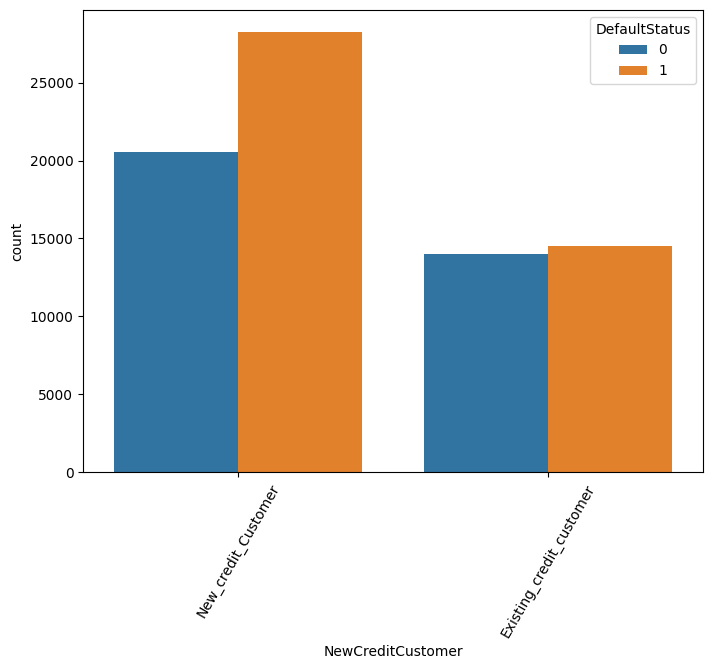

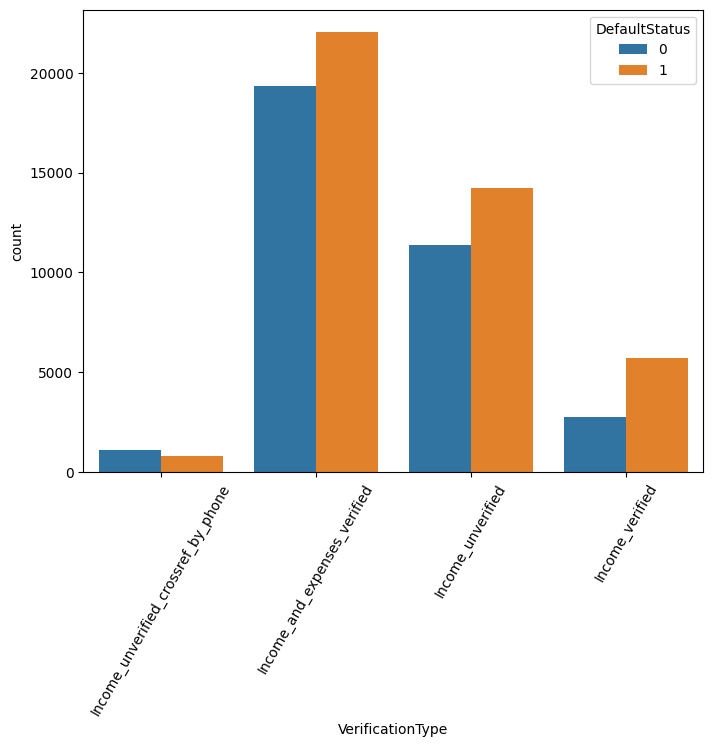

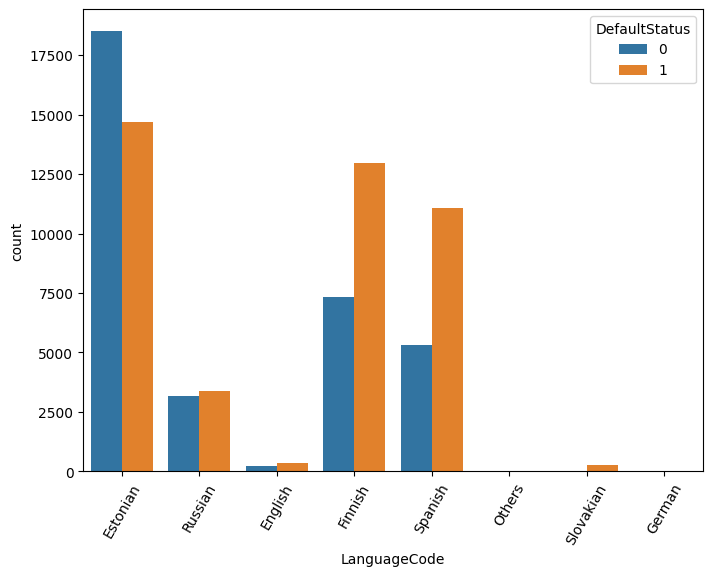

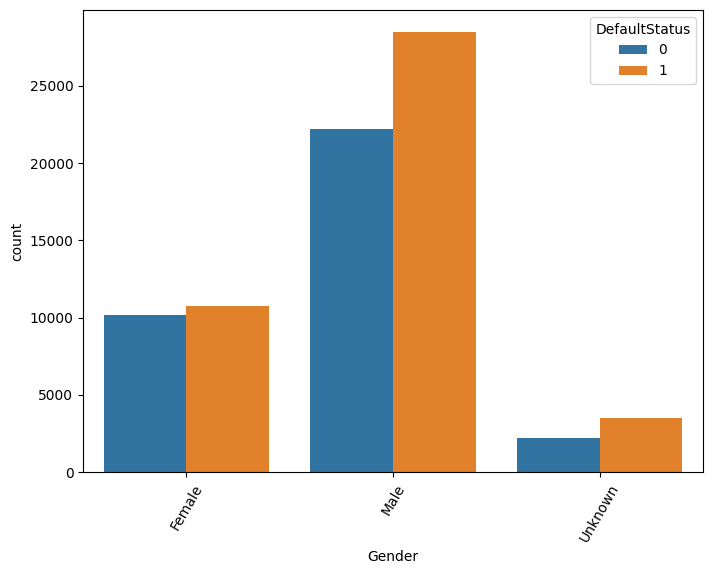

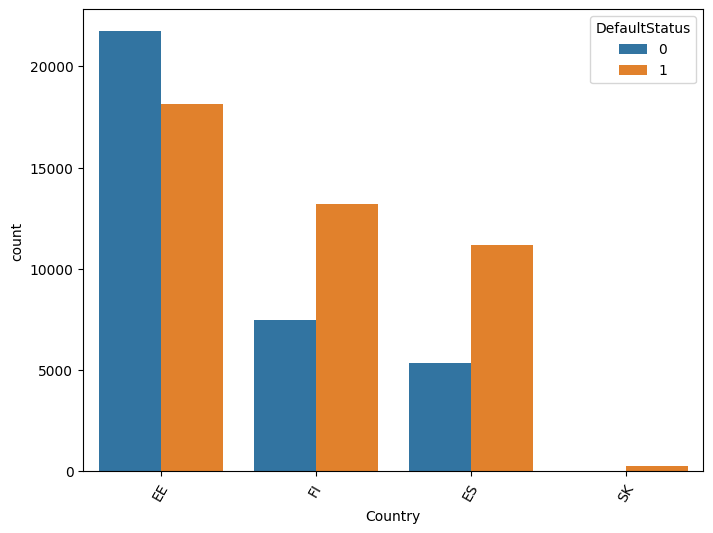

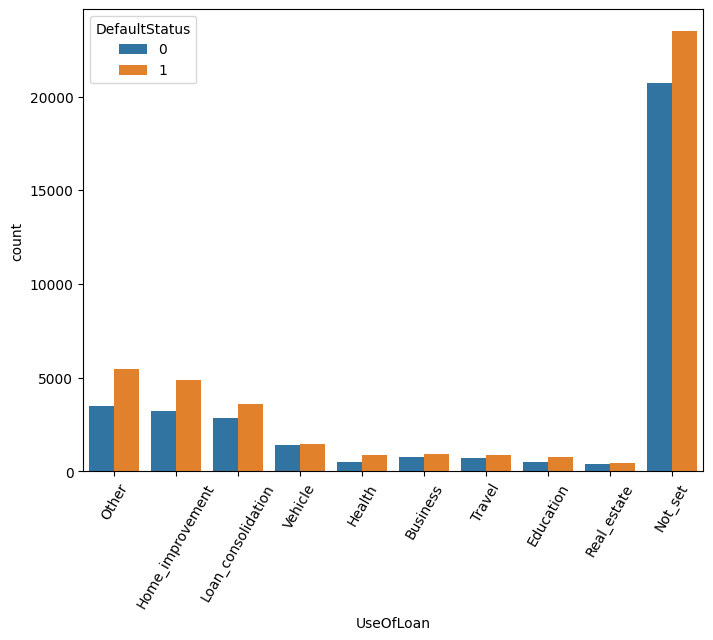

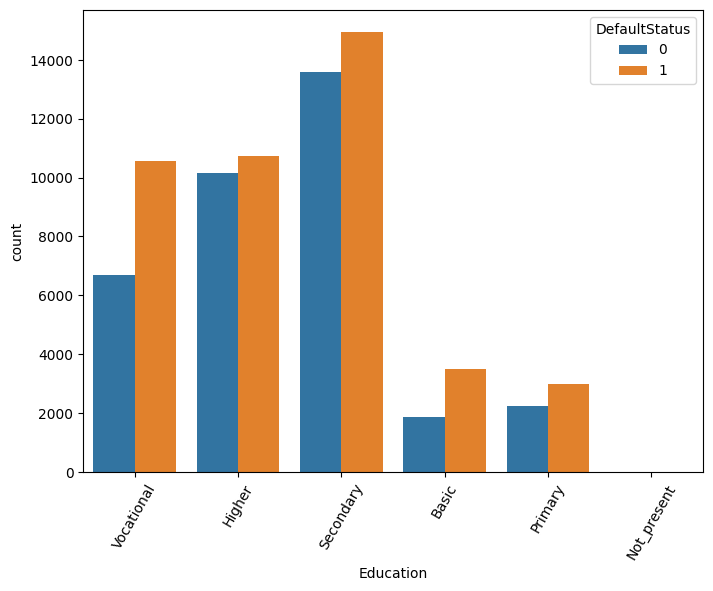

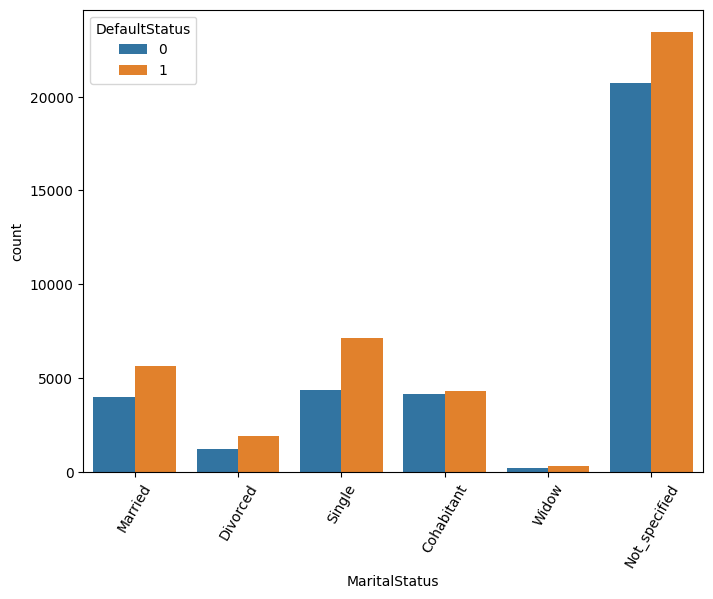

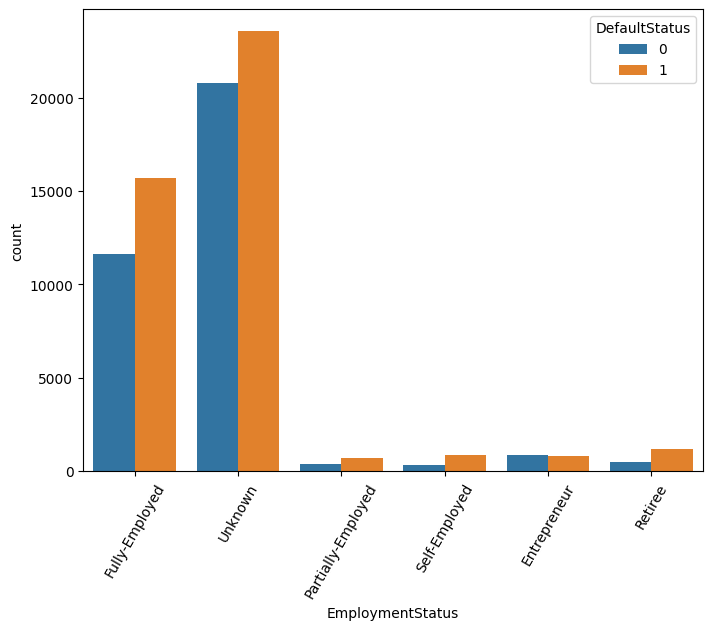

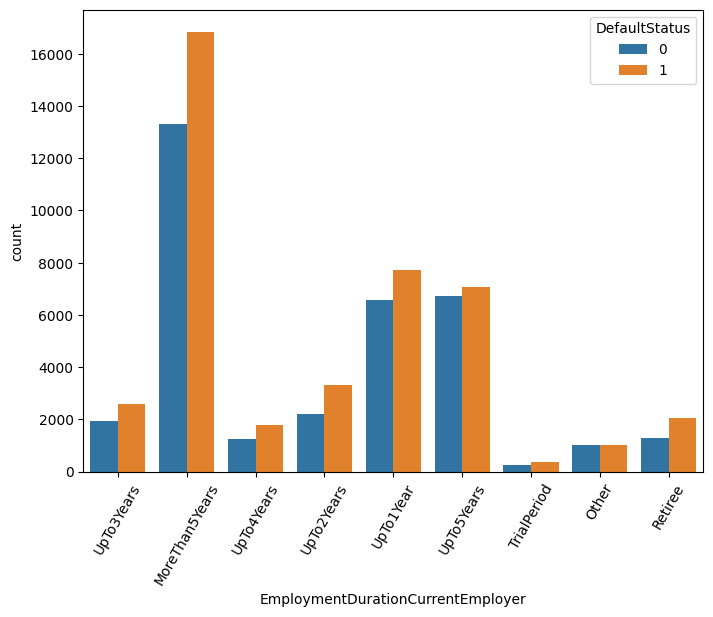

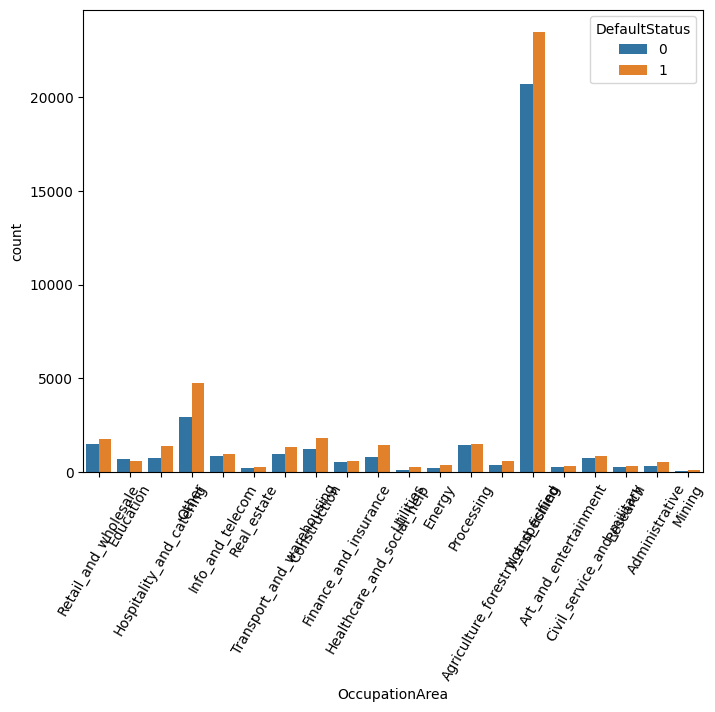

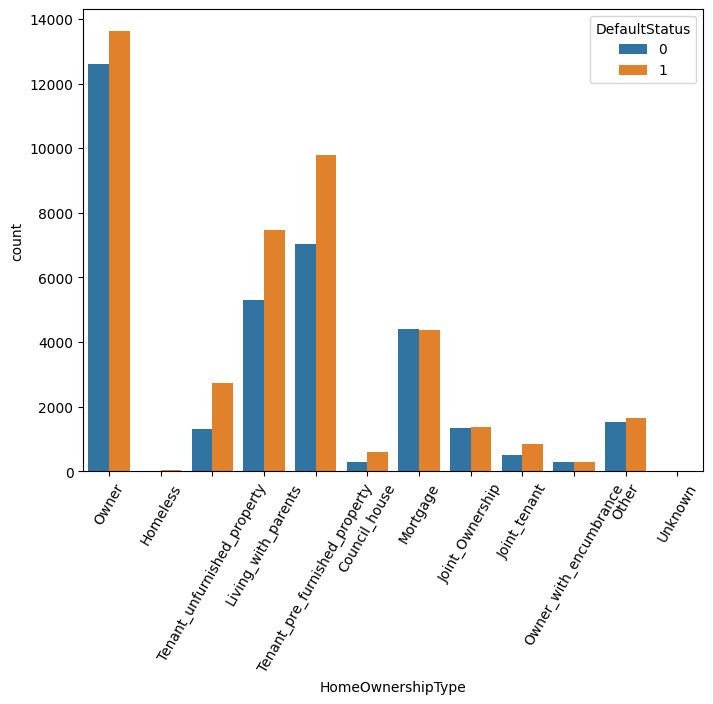

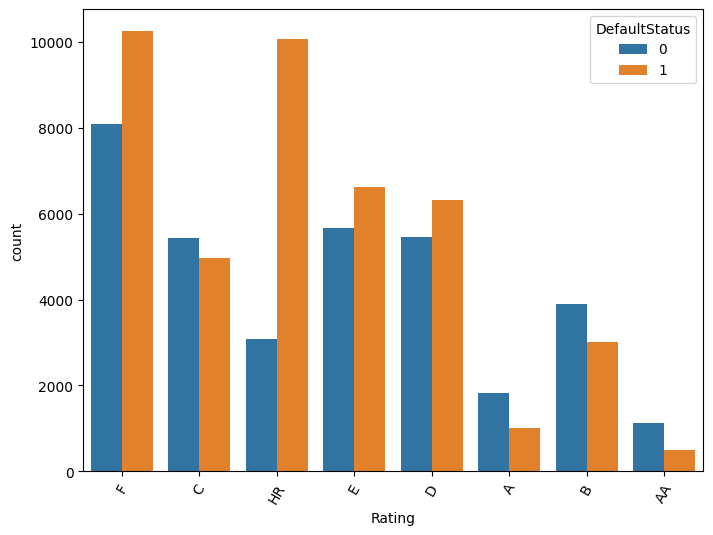

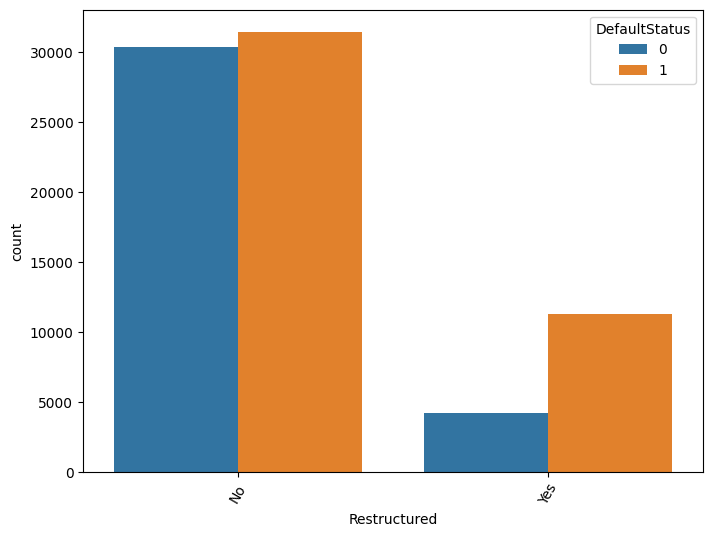

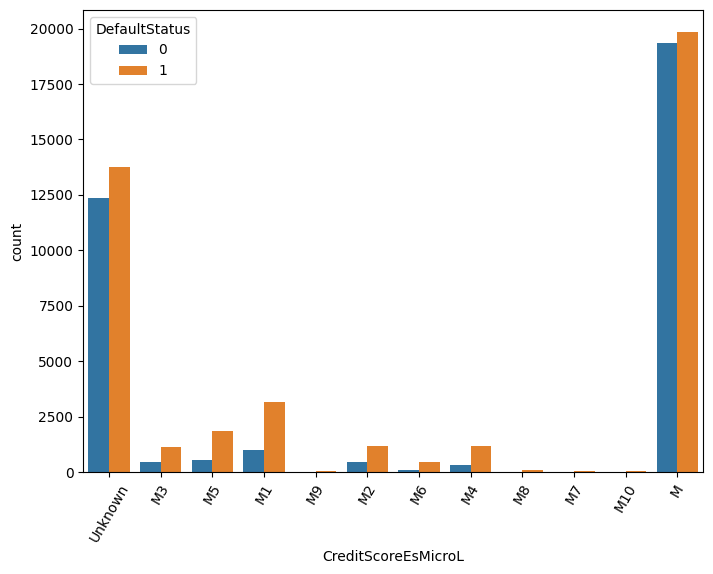

In [56]:
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df1,x=col, hue='DefaultStatus')
    plt.xticks(rotation=60)
    plt.show

In [57]:
# for col in cat_cols:
#     g=sns.catplot(data=df1, x=col, hue='DefaultStatus', kind='count')
#     g.fig.set_size_inches(20,5)
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

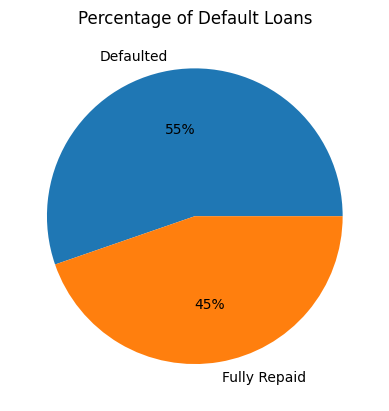

In [58]:
plt.title('Percentage of Default Loans')
plt.pie(df1['DefaultStatus'].value_counts(),labels=['Defaulted','Fully Repaid'] , autopct = '%0.0f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

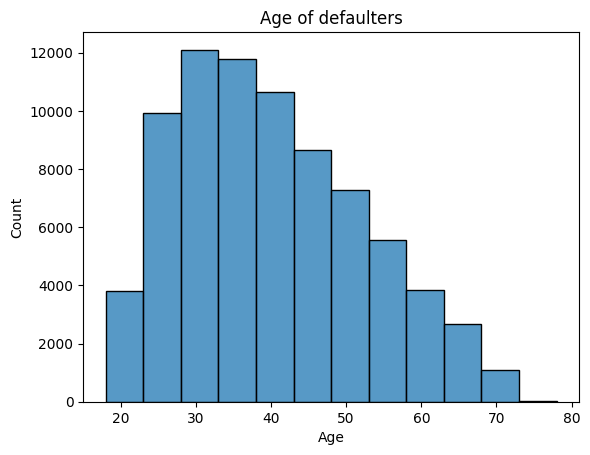

In [59]:
plt.title('Age of defaulters')
sns.histplot(df1,x='Age',binwidth=5)
plt.show

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

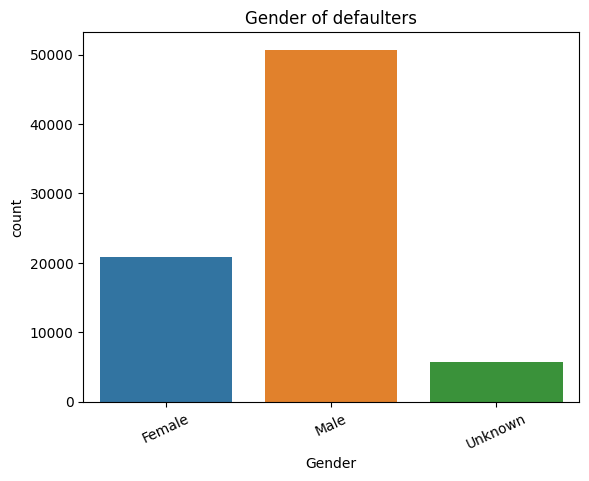

In [60]:
plt.title('Gender of defaulters')
sns.countplot(x=df1.Gender)
plt.xticks(rotation= 25)

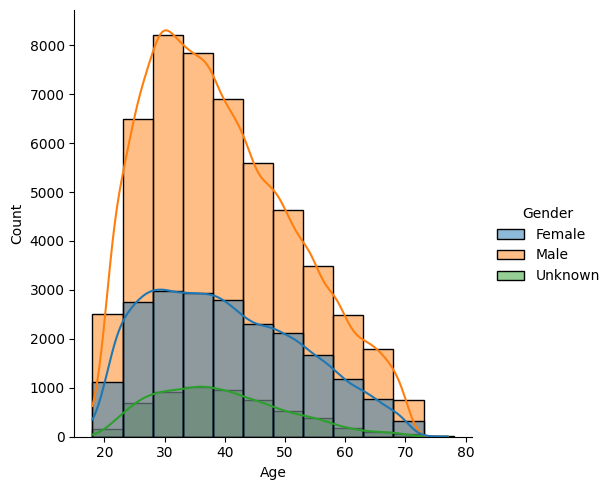

In [61]:
sns.displot(df1,x='Age',binwidth=5,kde=True,hue='Gender')

#### from above observations we can see the average age of the defaults is from 30 to 40 years. and Males have the highest number of default loans as compare to Female and unknown gender

<function matplotlib.pyplot.show(close=None, block=None)>

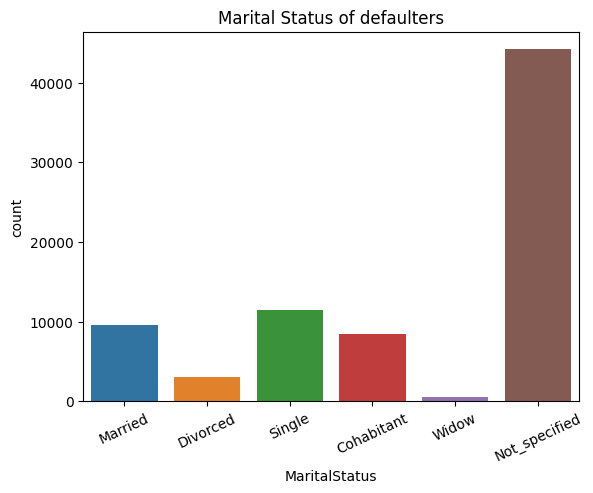

In [62]:
plt.title('Marital Status of defaulters')
sns.countplot(x=df1.MaritalStatus)
plt.xticks(rotation= 25)
plt.show

#### highest number of defaulters who have not specified their marital status

<function matplotlib.pyplot.show(close=None, block=None)>

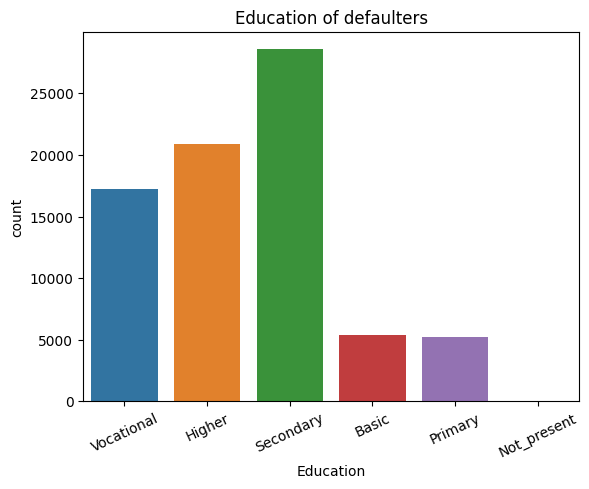

In [63]:
plt.title('Education of defaulters')
sns.countplot(x=df1.Education)
plt.xticks(rotation= 25)
plt.show

#### we can see that the secondary level of education has the highest number of defaulters

<function matplotlib.pyplot.show(close=None, block=None)>

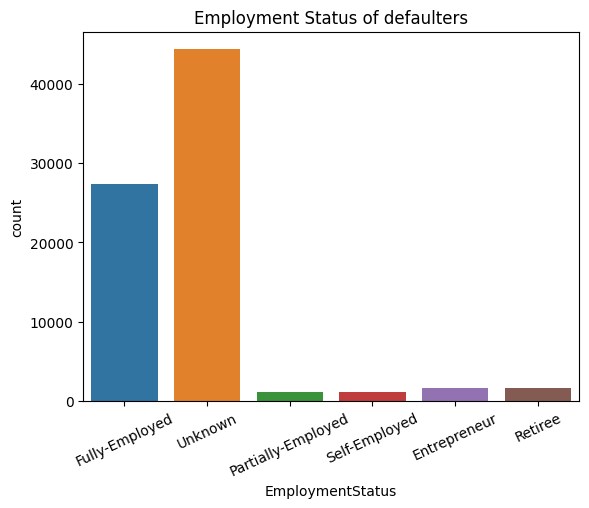

In [64]:
plt.title('Employment Status of defaulters')
sns.countplot(x=df1.EmploymentStatus)
plt.xticks(rotation= 25)
plt.show

#### here we see borrowers who didn’t specify their employment status have the highest number of default loans.

<function matplotlib.pyplot.show(close=None, block=None)>

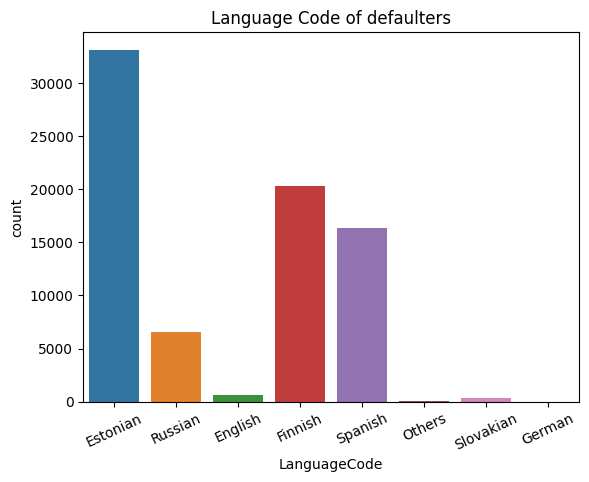

In [65]:
plt.title('Language Code of defaulters')
sns.countplot(x=df1.LanguageCode)
plt.xticks(rotation= 25)
plt.show

#### here Estonian, Finnish and Spanish language speakers have most default loans and also this p2p platform is targeted to european countries

<function matplotlib.pyplot.show(close=None, block=None)>

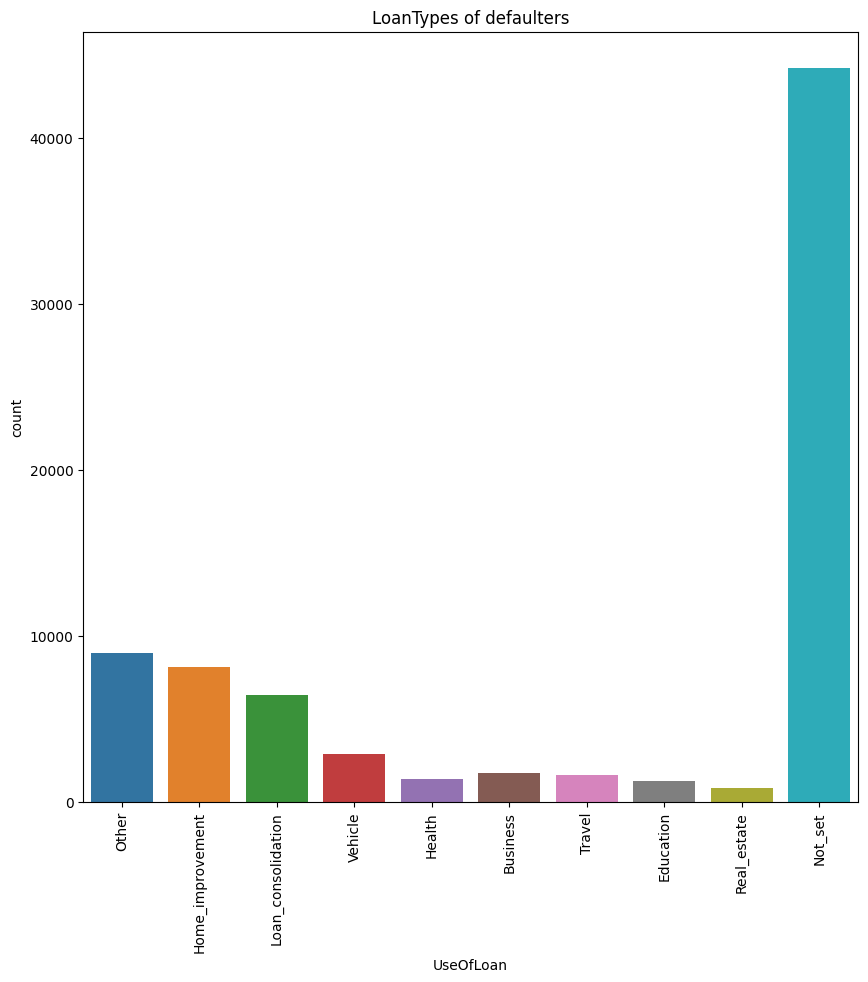

In [66]:
plt.figure(figsize=(10,10))
plt.title('LoanTypes of defaulters')
sns.countplot(x=df1.UseOfLoan)
plt.xticks(rotation= 90)
plt.show

#### we see that the most defaulted loans are which having no purpose to borrow but Other and Home improvement are second and third most defaulted loans

<function matplotlib.pyplot.show(close=None, block=None)>

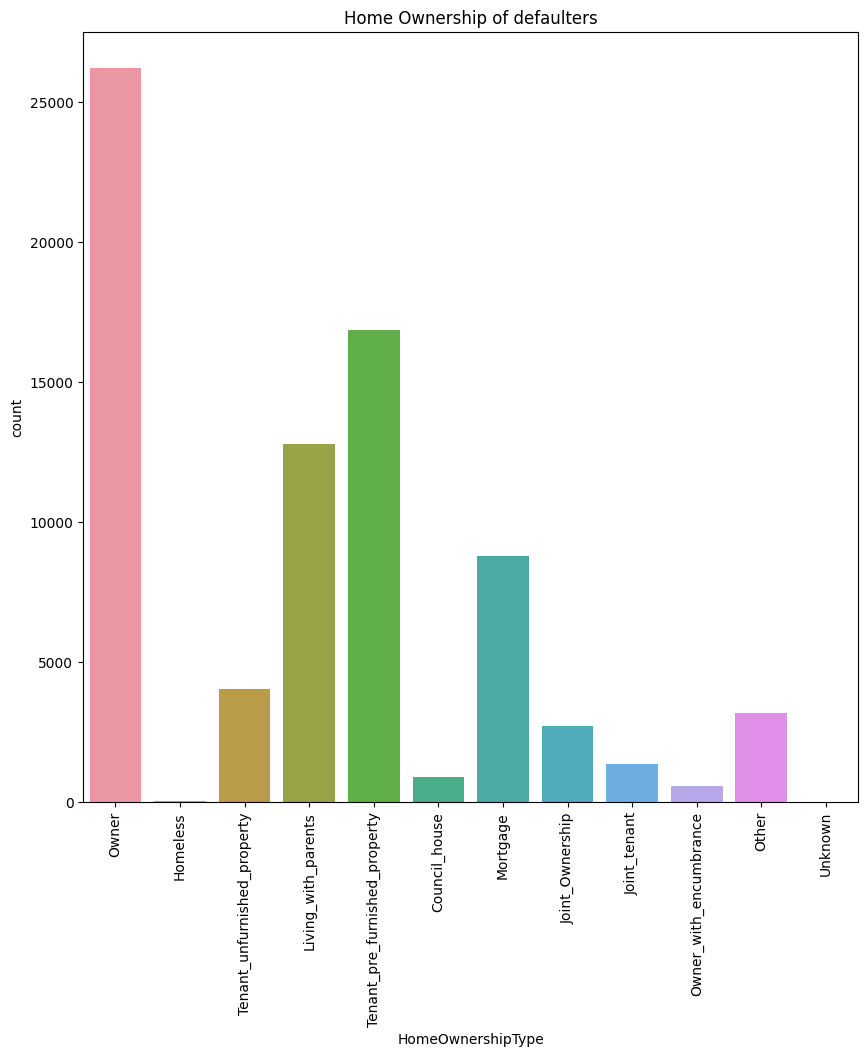

In [67]:
plt.figure(figsize=(10,10))
plt.title('Home Ownership of defaulters')
sns.countplot(x=df1.HomeOwnershipType)
plt.xticks(rotation=90)
plt.show

####  the owners of the houses have defaulted the most

<function matplotlib.pyplot.show(close=None, block=None)>

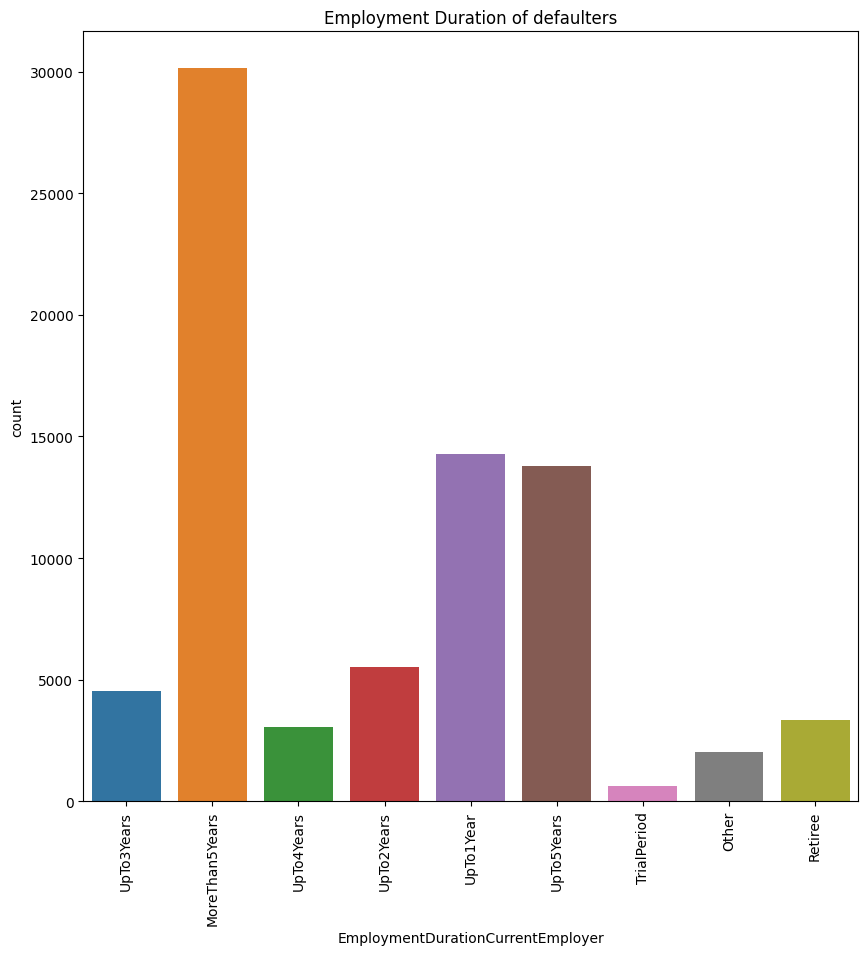

In [68]:
plt.figure(figsize=(10,10))
plt.title('Employment Duration of defaulters')
sns.countplot(x=df1.EmploymentDurationCurrentEmployer)
plt.xticks(rotation= 90)
plt.show

#### most defaulters have more than 5 year of employment while the second most defaulter who have employment of up to 1 year.

<function matplotlib.pyplot.show(close=None, block=None)>

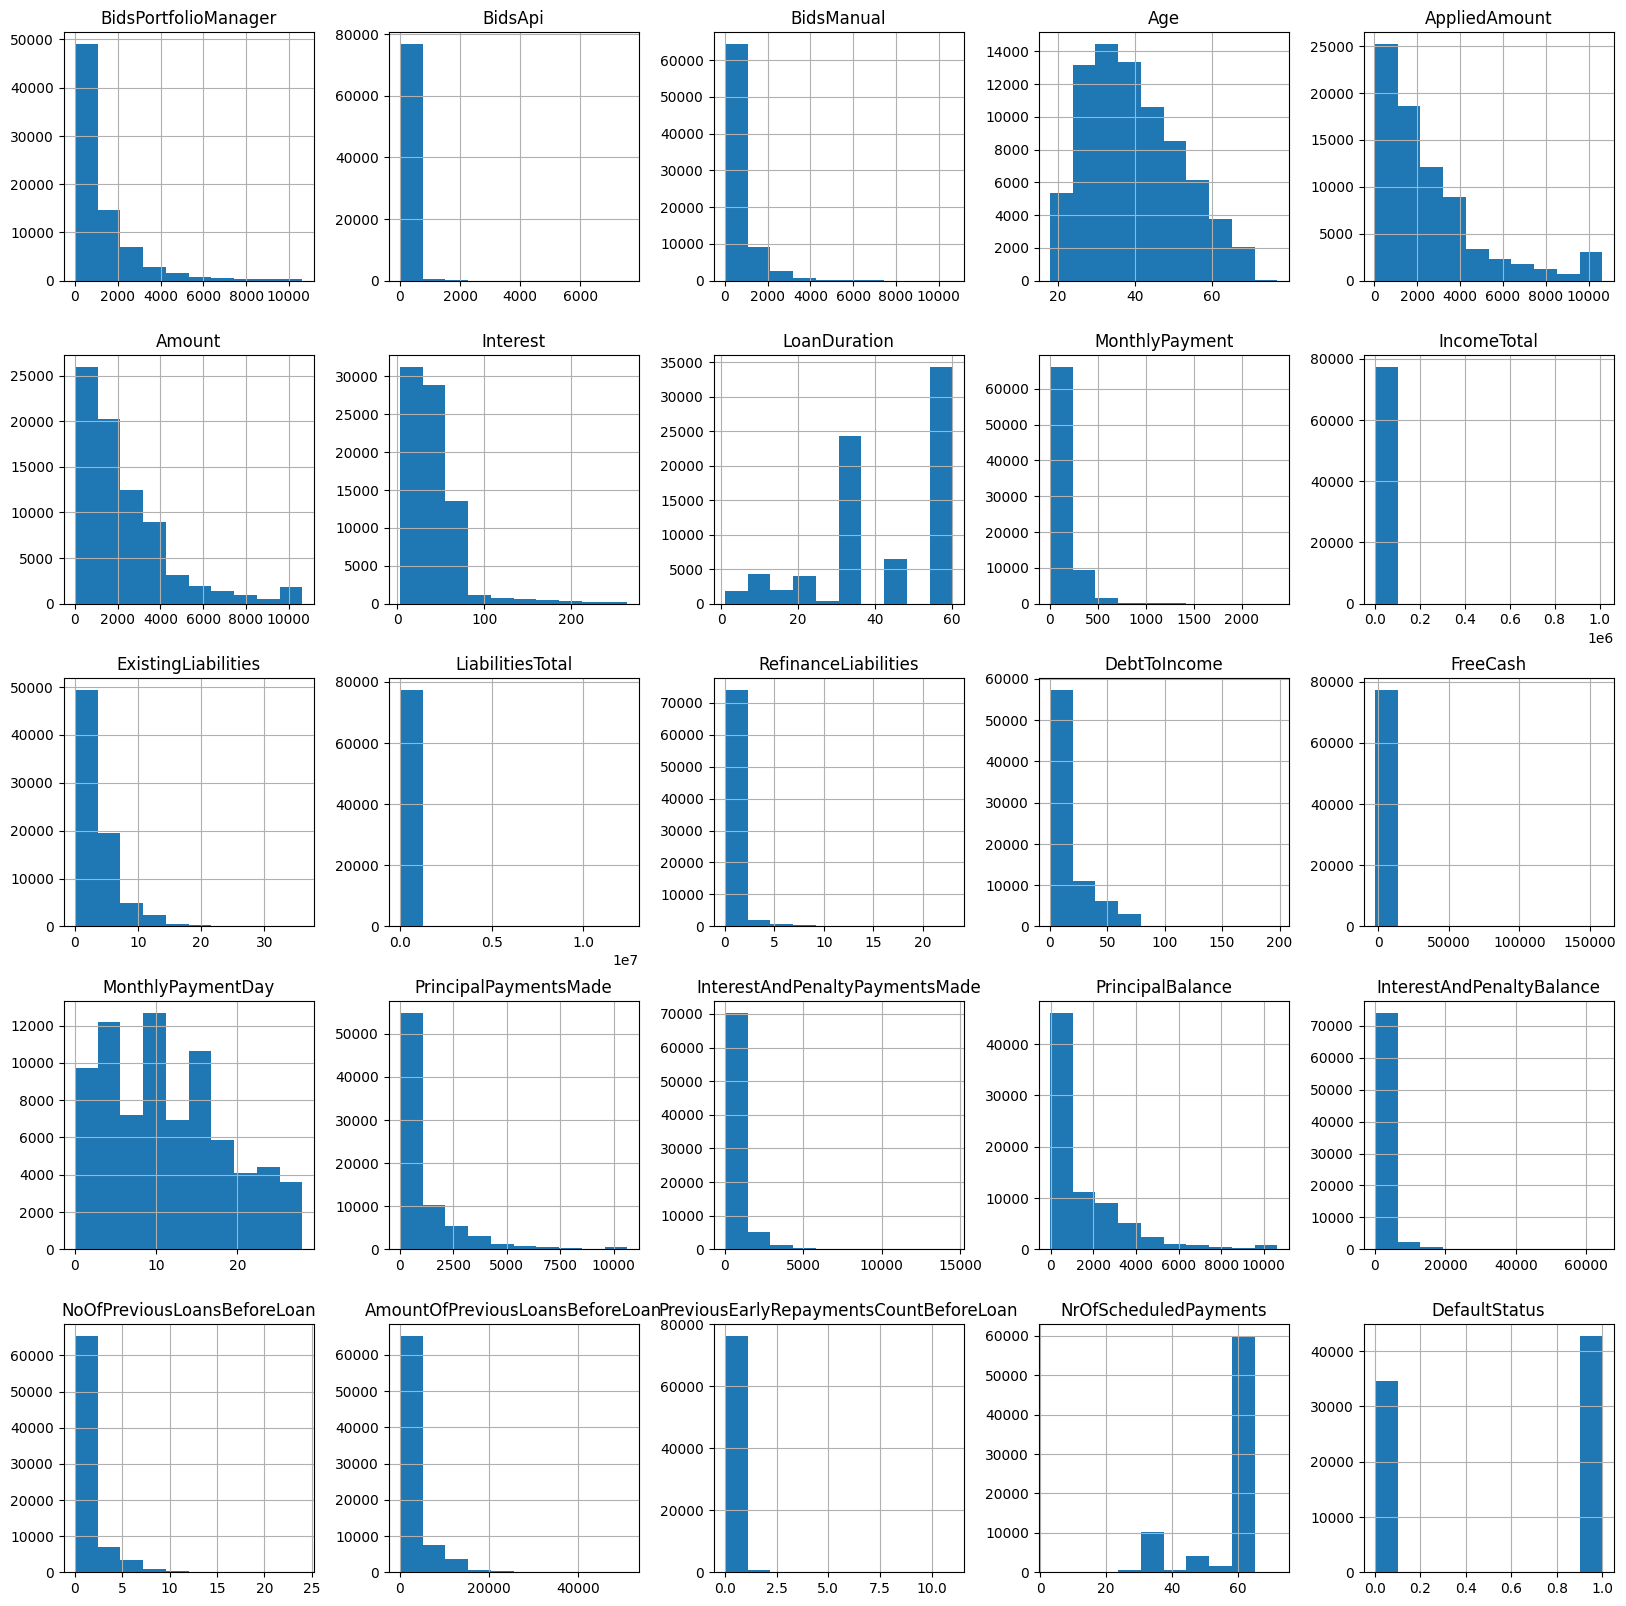

In [69]:
df1.hist(figsize=(20,20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

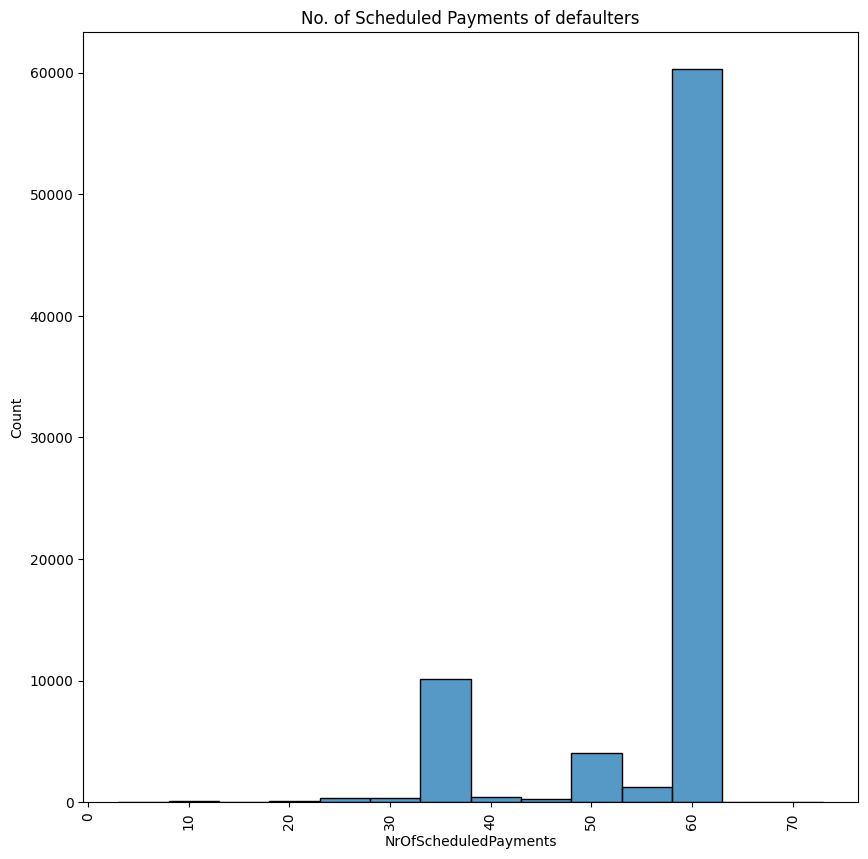

In [70]:
plt.figure(figsize=(10,10))
plt.title('No. of Scheduled Payments of defaulters')
sns.histplot(df1,x='NrOfScheduledPayments',binwidth=5)
plt.xticks(rotation= 90)
plt.show

#### most defaulters has 60 no. of scheduled payments and second most has 35 no. of scheduled payments

<AxesSubplot: >

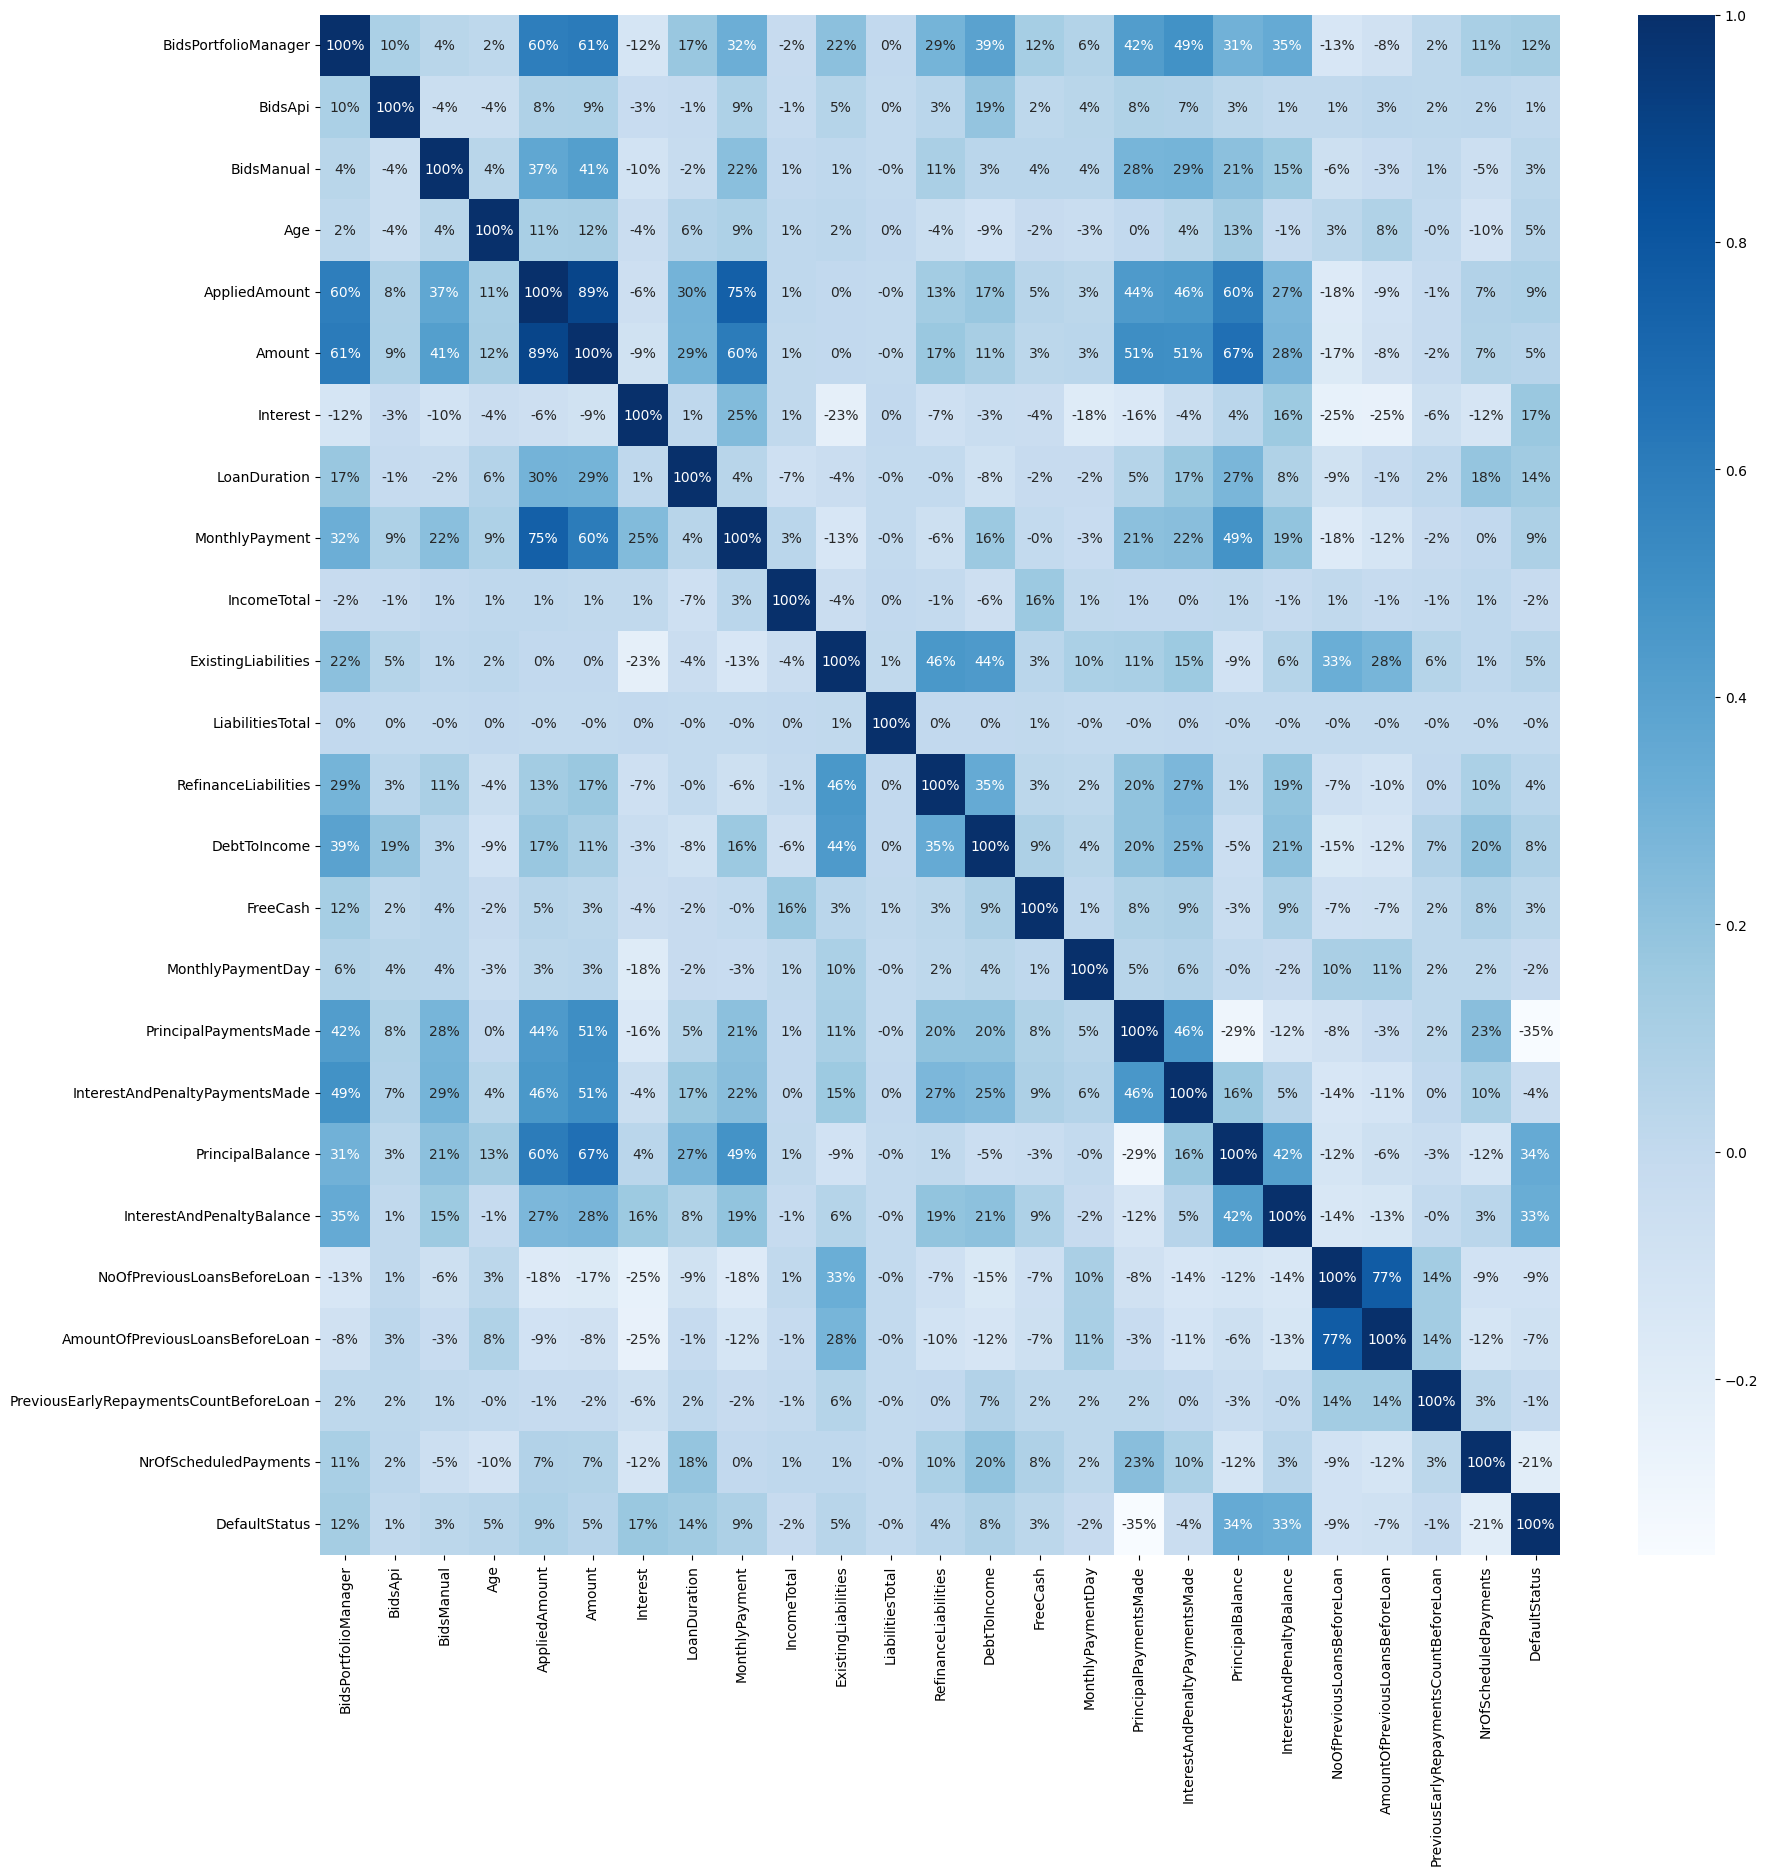

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cbar=True,annot=True,cmap='Blues',fmt=".0%")

In [72]:
df1

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,DefaultStatus
0,0,0,115.0410,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,61,Female,EE,319.5582,115.0408,30.00,12,46.39,HARJU,TALLINN,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,Owner,10500.0,0,0.00,0,0.00,0.00,25,F,No,Unknown,115.0408,20.4222,0.00,0.00,1,83.0852,0.0,0,60.0,0
1,0,0,140.6057,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,48,Female,EE,191.7349,140.6057,25.00,1,46.39,IDA-VIRU,KOHTLA-JARVE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,Owner,10800.0,0,0.00,0,0.00,0.00,15,F,No,Unknown,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,60.0,0
2,0,0,319.5580,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,58,Female,EE,319.5582,319.5409,25.00,20,46.39,PÄRNU,PÄRNU,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,Owner,7000.0,0,0.00,0,0.00,0.00,25,F,Yes,Unknown,203.1909,59.7626,116.35,414.07,0,0.0000,0.0,0,60.0,1
3,0,0,57.5205,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,23,Female,EE,127.8233,57.5205,45.00,15,46.39,HARJU,PALDISKI,Loan_consolidation,Basic,Single,Unknown,UpTo2Years,Other,Owner,11600.0,0,0.00,0,0.00,0.00,15,F,No,Unknown,57.5205,18.7323,0.00,0.00,1,134.2144,0.0,0,60.0,0
4,0,0,319.5582,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,25,Female,EE,319.5582,319.5436,30.00,12,46.39,TARTU,TARTU,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,Owner,6800.0,0,0.00,0,0.00,0.00,25,F,No,Unknown,319.5436,220.4200,0.00,0.00,1,146.9966,0.0,0,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,New_credit_Customer,Income_verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.68,PÄIJÄT-HÄME,LAHTI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,1400.0,1,500.00,0,7.69,792.32,1,E,No,Unknown,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0,0,60.0,1
134525,1880,0,1120.0000,Existing_credit_customer,Income_verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.33,POHJOIS KARJAALA,JOENSUU,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,No,Unknown,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.36,0,60.0,0
134526,1975,0,525.0000,New_credit_Customer,Income_unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.42,VARSINAIS-SUOMI,SAUVO,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,No,Unknown,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0,0,60.0,1
134527,1840,0,1160.0000,Existing_credit_customer,Income_and_expenses_verified,Estonian,47,Female,EE,3000.0000,3000.0000,17.74,60,84.51,VALGA,VALGA,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,540.0,8,732.05,2,44.35,50.49,1,B,Yes,Unknown,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8,0,60.0,1


## Feature Engineering

In [73]:
df_cat_cols=pd.DataFrame(df1[cat_cols])
df_num_cols=pd.DataFrame(df1[num_cols])

In [74]:
df_cat_cols

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL
0,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,Owner,F,No,Unknown
1,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,Owner,F,No,Unknown
2,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,Owner,F,Yes,Unknown
3,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Loan_consolidation,Basic,Single,Unknown,UpTo2Years,Other,Owner,F,No,Unknown
4,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,Owner,F,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,New_credit_Customer,Income_verified,Finnish,Male,FI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,E,No,Unknown
134525,Existing_credit_customer,Income_verified,Finnish,Male,FI,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,B,No,Unknown
134526,New_credit_Customer,Income_unverified,Finnish,Male,FI,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,D,No,Unknown
134527,Existing_credit_customer,Income_and_expenses_verified,Estonian,Female,EE,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,B,Yes,Unknown


In [75]:
loan_data=pd.concat([df_cat_cols,df_num_cols], axis=1)
loan_data

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,DefaultStatus
0,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,Owner,F,No,Unknown,0,0,115.0410,61,319.5582,115.0408,30.00,12,46.39,10500.0,0,0.00,0,0.00,0.00,25,115.0408,20.4222,0.00,0.00,1,83.0852,0.0,0,60.0,0
1,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,Owner,F,No,Unknown,0,0,140.6057,48,191.7349,140.6057,25.00,1,46.39,10800.0,0,0.00,0,0.00,0.00,15,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,60.0,0
2,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,Owner,F,Yes,Unknown,0,0,319.5580,58,319.5582,319.5409,25.00,20,46.39,7000.0,0,0.00,0,0.00,0.00,25,203.1909,59.7626,116.35,414.07,0,0.0000,0.0,0,60.0,1
3,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Loan_consolidation,Basic,Single,Unknown,UpTo2Years,Other,Owner,F,No,Unknown,0,0,57.5205,23,127.8233,57.5205,45.00,15,46.39,11600.0,0,0.00,0,0.00,0.00,15,57.5205,18.7323,0.00,0.00,1,134.2144,0.0,0,60.0,0
4,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,Owner,F,No,Unknown,0,0,319.5582,25,319.5582,319.5436,30.00,12,46.39,6800.0,0,0.00,0,0.00,0.00,25,319.5436,220.4200,0.00,0.00,1,146.9966,0.0,0,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,New_credit_Customer,Income_verified,Finnish,Male,FI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,E,No,Unknown,2515,0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,1400.0,1,500.00,0,7.69,792.32,1,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0,0,60.0,1
134525,Existing_credit_customer,Income_verified,Finnish,Male,FI,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,B,No,Unknown,1880,0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,2265.0,5,1777.46,0,31.58,520.67,7,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.36,0,60.0,0
134526,New_credit_Customer,Income_unverified,Finnish,Male,FI,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,D,No,Unknown,1975,0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,2500.0,2,1350.00,0,3.22,1069.58,1,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0,0,60.0,1
134527,Existing_credit_customer,Income_and_expenses_verified,Estonian,Female,EE,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,B,Yes,Unknown,1840,0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,540.0,8,732.05,2,44.35,50.49,1,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8,0,60.0,1


In [76]:
X=loan_data.copy()
y=X.pop('DefaultStatus')

# for col in X.select_dtypes("object"):
#     X[col], _ = X[col].factorize()

# discrete_features = X.dtypes == int

In [77]:
y=pd.DataFrame(y)
y

,DefaultStatus
0,0
1,0
2,1
3,0
4,1
...,...
134524,1
134525,0
134526,1
134527,1


In [78]:
X

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments
0,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Vocational,Married,Fully-Employed,UpTo3Years,Retail_and_wholesale,Owner,F,No,Unknown,0,0,115.0410,61,319.5582,115.0408,30.00,12,46.39,10500.0,0,0.00,0,0.00,0.00,25,115.0408,20.4222,0.00,0.00,1,83.0852,0.0,0,60.0
1,Existing_credit_customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Other,Higher,Divorced,Fully-Employed,MoreThan5Years,Education,Owner,F,No,Unknown,0,0,140.6057,48,191.7349,140.6057,25.00,1,46.39,10800.0,0,0.00,0,0.00,0.00,15,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,60.0
2,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Home_improvement,Secondary,Married,Fully-Employed,UpTo4Years,Hospitality_and_catering,Owner,F,Yes,Unknown,0,0,319.5580,58,319.5582,319.5409,25.00,20,46.39,7000.0,0,0.00,0,0.00,0.00,25,203.1909,59.7626,116.35,414.07,0,0.0000,0.0,0,60.0
3,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Loan_consolidation,Basic,Single,Unknown,UpTo2Years,Other,Owner,F,No,Unknown,0,0,57.5205,23,127.8233,57.5205,45.00,15,46.39,11600.0,0,0.00,0,0.00,0.00,15,57.5205,18.7323,0.00,0.00,1,134.2144,0.0,0,60.0
4,New_credit_Customer,Income_unverified_crossref_by_phone,Estonian,Female,EE,Vehicle,Secondary,Cohabitant,Fully-Employed,UpTo2Years,Retail_and_wholesale,Owner,F,No,Unknown,0,0,319.5582,25,319.5582,319.5436,30.00,12,46.39,6800.0,0,0.00,0,0.00,0.00,25,319.5436,220.4200,0.00,0.00,1,146.9966,0.0,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,New_credit_Customer,Income_verified,Finnish,Male,FI,Loan_consolidation,Vocational,Single,Fully-Employed,MoreThan5Years,Other,Council_house,E,No,Unknown,2515,0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,1400.0,1,500.00,0,7.69,792.32,1,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0,0,60.0
134525,Existing_credit_customer,Income_verified,Finnish,Male,FI,Home_improvement,Vocational,Single,Fully-Employed,MoreThan5Years,Transport_and_warehousing,Owner,B,No,Unknown,1880,0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,2265.0,5,1777.46,0,31.58,520.67,7,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.36,0,60.0
134526,New_credit_Customer,Income_unverified,Finnish,Male,FI,Loan_consolidation,Vocational,Married,Entrepreneur,MoreThan5Years,Construction,Owner,D,No,Unknown,1975,0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,2500.0,2,1350.00,0,3.22,1069.58,1,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0,0,60.0
134527,Existing_credit_customer,Income_and_expenses_verified,Estonian,Female,EE,Other,Higher,Married,Fully-Employed,MoreThan5Years,Healthcare_and_social_help,Tenant_unfurnished_property,B,Yes,Unknown,1840,0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,540.0,8,732.05,2,44.35,50.49,1,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8,0,60.0


In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [80]:
# cat_cols,len(cat_cols)

In [81]:
# num_cols,len(num_cols)


In [82]:
for col in X==object:
    X[col]=X[col].astype(str)

In [83]:
for col in X==object:
    X[col]=LabelEncoder().fit_transform(X[col])
X.head()

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments
0,1,2,1,0,0,6,5,2,1,6,17,7,6,0,11,0,0,186,43,212,144,2741,3,15828,82,0,0,0,0,21,18,2085,15174,5,10,1,6996,0,0,51
1,0,2,1,0,0,6,1,1,1,0,5,7,6,0,11,0,0,486,30,107,404,2270,0,15828,124,0,0,0,0,21,7,4876,15004,5,10,12,3504,10773,0,51
2,1,2,1,0,0,3,4,2,1,7,9,7,6,1,11,0,0,2277,40,212,2241,2270,12,15828,3353,0,0,0,0,21,18,10111,37153,1710,25515,0,0,0,0,51
3,1,2,1,0,0,4,0,4,5,5,13,7,6,0,11,0,0,3186,5,44,3685,3999,6,15828,228,0,0,0,0,21,7,24616,12952,5,10,1,1508,0,0,51
4,1,2,1,0,0,9,4,0,1,5,17,7,6,0,11,0,0,2279,7,212,2245,2741,3,15828,3322,0,0,0,0,21,18,16509,17185,5,10,1,1898,0,0,51


In [84]:
for col in X!=object:
    X[col]=StandardScaler().fit_transform(X[[col]])
X.head()

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments
0,0.764313,1.355096,-0.782552,-1.452499,-0.883231,0.758037,1.123195,-0.550596,-1.220316,0.872701,1.619855,0.224047,0.735603,-0.500663,1.335225,-1.401242,-0.558044,-1.306889,1.758319,-0.131383,-1.531322,-0.118434,-3.027201,0.894472,-1.284977,-1.086487,-1.304101,-0.277684,-0.62091,-0.659317,0.670572,-1.231187,-0.351247,-0.902003,-0.890609,-0.443295,2.245785,-1.039437,-0.190562,0.490157
1,-1.308364,1.355096,-0.782552,-1.452499,-0.883231,0.758037,-1.199677,-1.424878,-1.220316,-1.057877,-1.823544,0.224047,0.735603,-0.500663,1.335225,-1.401242,-0.558044,-1.073516,0.688254,-0.909713,-1.342935,-0.451594,-3.508547,0.894472,-1.252009,-1.086487,-1.304101,-0.277684,-0.62091,-0.659317,-0.546120,-0.949866,-0.362224,-0.902003,-0.890609,1.082981,0.767004,-0.094877,-0.190562,0.490157
2,0.764313,1.355096,-0.782552,-1.452499,-0.883231,-1.178884,0.542477,-0.550596,-1.220316,1.194464,-0.675745,0.224047,0.735603,1.997353,1.335225,-1.401242,-0.558044,0.319720,1.511381,-0.131383,-0.011910,-0.451594,-1.583161,0.894472,1.282621,-1.086487,-1.304101,-0.277684,-0.62091,-0.659317,0.670572,-0.422202,1.067965,-0.749529,1.040120,-0.582048,-0.716859,-1.039437,-0.190562,0.490157
3,0.764313,1.355096,-0.782552,-1.452499,-0.883231,-0.533243,-1.780395,1.197968,0.833822,0.550938,0.472055,0.224047,0.735603,-0.500663,1.335225,-1.401242,-0.558044,1.026840,-1.369564,-1.376712,1.034362,0.771407,-2.545854,0.894472,-1.170374,-1.086487,-1.304101,-0.277684,-0.62091,-0.659317,-0.546120,1.039838,-0.494724,-0.902003,-0.890609,-0.443295,-0.078256,-1.039437,-0.190562,0.490157
4,0.764313,1.355096,-0.782552,-1.452499,-0.883231,2.694959,0.542477,-2.299160,-1.220316,0.550938,1.619855,0.224047,0.735603,-0.500663,1.335225,-1.401242,-0.558044,0.321276,-1.204939,-0.131383,-0.009011,-0.118434,-3.027201,0.894472,1.258288,-1.086487,-1.304101,-0.277684,-0.62091,-0.659317,0.670572,0.222688,-0.221394,-0.902003,-0.890609,-0.443295,0.086900,-1.039437,-0.190562,0.490157


In [85]:
# cat_cols_data=df1[cat_cols]


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [40] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [33] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [40] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[33]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


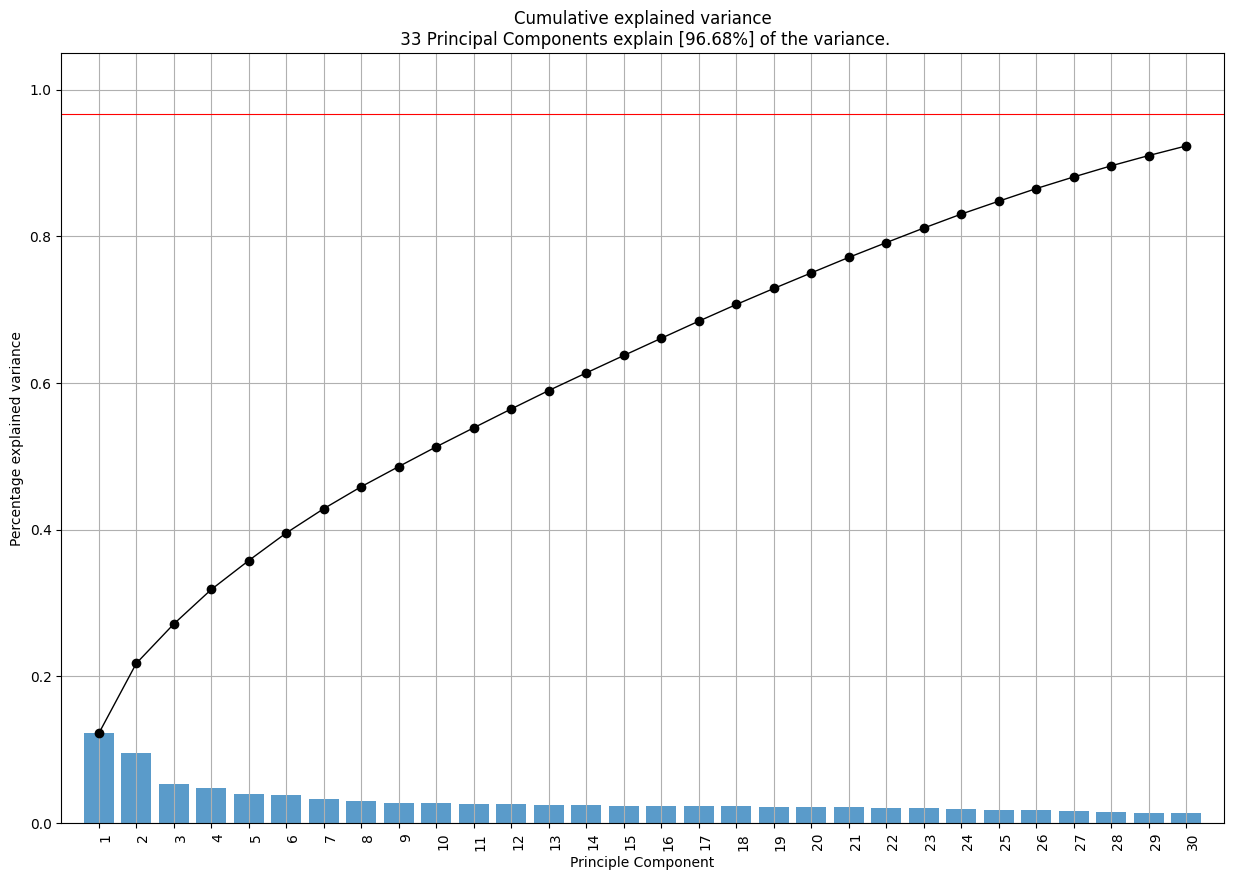

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

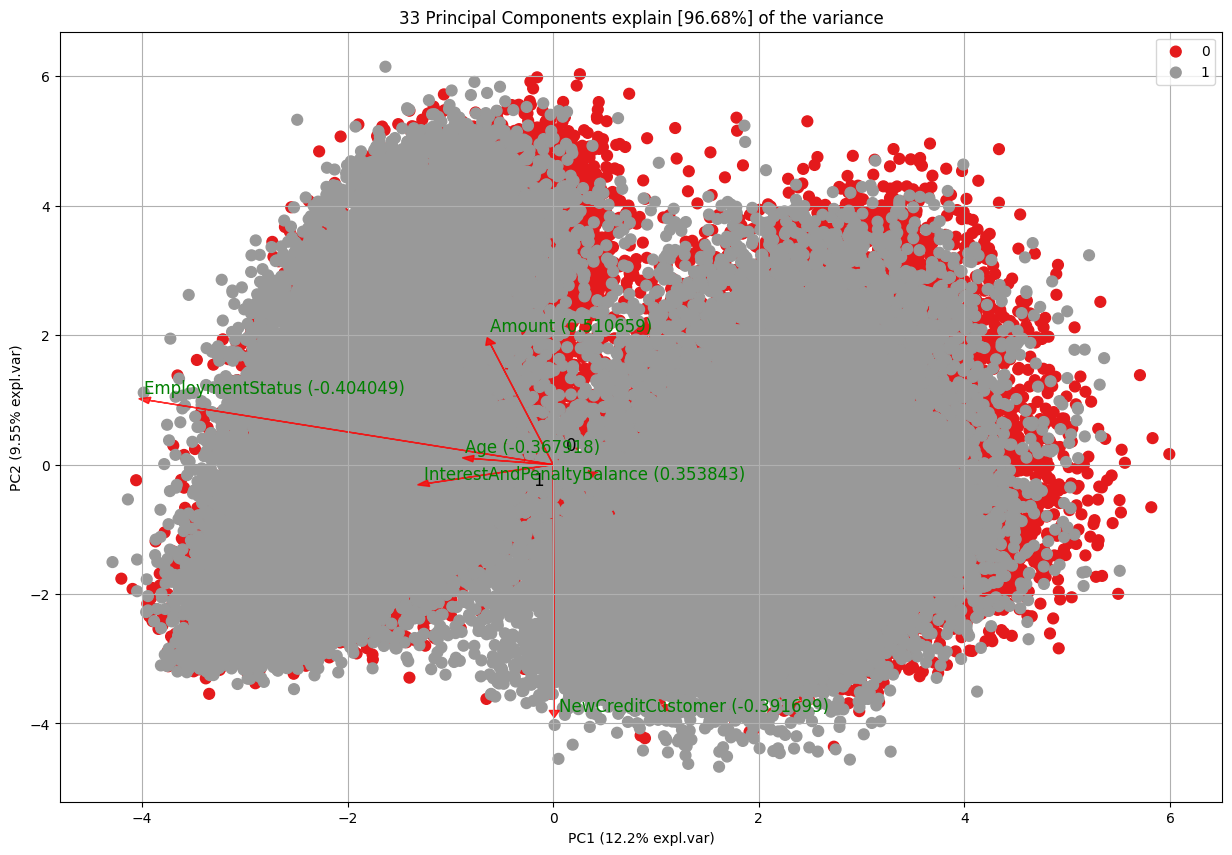

In [86]:
from pca import pca
pca=pca(normalize=True)
out=pca.fit_transform(X)
fig,ax=pca.plot(n_components=30)
fig,ax=pca.biplot(n_feat=5,y=y['DefaultStatus'])

In [87]:
df_pca=pd.DataFrame(out['topfeat'])
df_pca[df_pca['type']=='best']

,PC,feature,loading,type
0,PC1,EmploymentStatus,-0.404049,best
1,PC2,NewCreditCustomer,-0.391699,best
2,PC3,Amount,0.510659,best
3,PC4,InterestAndPenaltyBalance,0.353843,best
4,PC5,Age,-0.367918,best
5,PC6,InterestAndPenaltyBalance,-0.344872,best
6,PC7,Age,0.473327,best
7,PC8,VerificationType,-0.481626,best
8,PC9,BidsApi,-0.562753,best
9,PC10,LoanDuration,0.408402,best


In [88]:
columns_pca=list(df_pca['feature'][df_pca['type']=='best'])
X=X[columns_pca]

In [89]:
X.shape

(77341, 33)

In [90]:
y.shape

(77341, 1)

In [91]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [92]:
mi_scores

InterestAndPenaltyBalance                 0.340896
InterestAndPenaltyBalance                 0.340456
PrincipalPaymentsMade                     0.279107
MonthlyPayment                            0.059008
Interest                                  0.058555
NrOfScheduledPayments                     0.044669
Amount                                    0.041910
BidsPortfolioManager                      0.022097
PreviousRepaymentsBeforeLoan              0.022041
IncomeTotal                               0.021231
LoanDuration                              0.017781
Restructured                              0.014481
LiabilitiesTotal                          0.012487
MonthlyPaymentDay                         0.009835
Education                                 0.008593
HomeOwnershipType                         0.007376
DebtToIncome                              0.007358
Age                                       0.007163
VerificationType                          0.006641
OccupationArea                 

Text(0.5, 1.0, 'Mutual Information Scores')

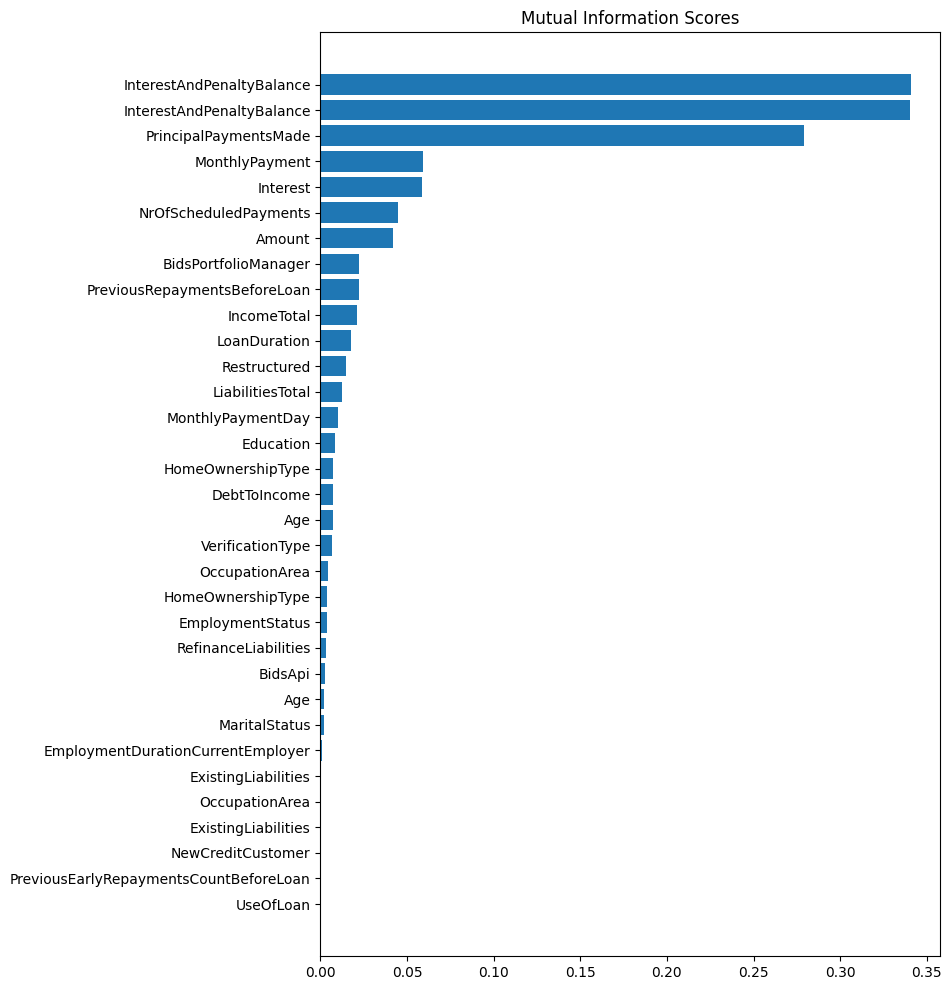

In [93]:
plt.figure(figsize=(8, 12))
mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

In [94]:
 from sklearn.feature_selection import mutual_info_classif
 from sklearn.feature_selection import SelectPercentile
 from sklearn.feature_selection import SelectKBest

In [95]:
X_1=SelectKBest(mutual_info_classif, k=25)
X_1_new=X_1.fit_transform(X, y)
X_1_new.shape

(77341, 25)

In [96]:
cols=X_1.get_support(indices=True)
new_columns_1=X.iloc[:,cols].columns.tolist()
new_columns_1

['EmploymentStatus',
 'NewCreditCustomer',
 'Amount',
 'InterestAndPenaltyBalance',
 'InterestAndPenaltyBalance',
 'VerificationType',
 'BidsApi',
 'LoanDuration',
 'HomeOwnershipType',
 'Education',
 'OccupationArea',
 'MonthlyPaymentDay',
 'UseOfLoan',
 'OccupationArea',
 'IncomeTotal',
 'BidsPortfolioManager',
 'Restructured',
 'LiabilitiesTotal',
 'MonthlyPayment',
 'PrincipalPaymentsMade',
 'PreviousRepaymentsBeforeLoan',
 'ExistingLiabilities',
 'NrOfScheduledPayments',
 'Interest',
 'DebtToIncome']

## Models

### Logistic Regression

In [97]:
# X_1_df=pd.DataFrame(X_1_new,columns=new_columns_1)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [113]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [114]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model1=log_reg.fit(X_train,y_train)

In [117]:
print("Logistic Rregression training accuracy= ",model1.score(X_train,y_train))
print("Accuracy Score= ",accuracy_score(y_test,model1.predict(X_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,model1.predict(X_test)))

Logistic Rregression training accuracy=  0.7626436144667331
Accuracy Score=  0.763263371115804
Confusion Matrix:
 [[7778 2713]
 [2780 9932]]


In [118]:
y_pred = model1.predict(X_test)

y_pred = np.array(y_pred>0.5)
print(y_pred.ravel().astype(int))

[1 1 1 ... 1 1 1]


In [119]:
np.array(y_test)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [127]:
def plot_roc_curve(model,X_test,y_test):
    ypred=model.predict(X_test)
    fpr,tpr,thresholds=roc_curve(y_test,ypred)
    plt.plot([0,1],[0,1],color="green",linestyle='--')
    plt.plot(fpr,tpr)
    plt.xlabel("False positive rate",color='green')
    plt.ylabel("True positive rate",color='green')
    plt.title("ROC curve")

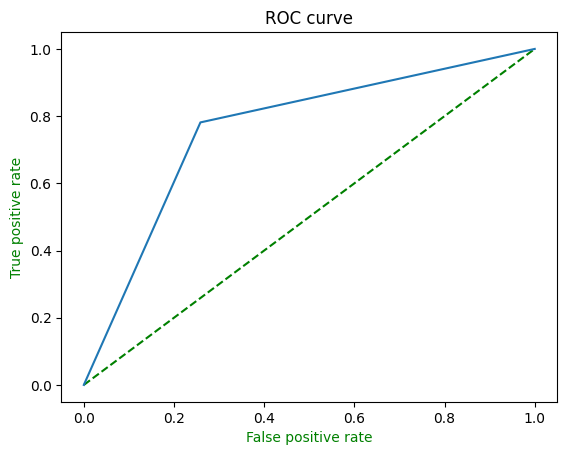

In [128]:
plot_roc_curve(model1,X_test,y_test)

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
model2=RandomForestClassifier(n_estimators=10)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [132]:
print("Random Forest training accuracy= ",model2.score(X_train,y_train))
print("Accuracy Score= ",accuracy_score(y_test,model2.predict(X_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,model2.predict(X_test)))

Random Forest training accuracy=  0.9924637038678932
Accuracy Score=  0.8591130457268457
Confusion Matrix:
 [[ 9057  1434]
 [ 1835 10877]]


In [133]:
y_pred = model2.predict(X_test)

y_pred = np.array(y_pred>0.5)
print(y_pred.ravel().astype(int))

[0 1 1 ... 1 1 1]


In [134]:
np.array(y_test)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

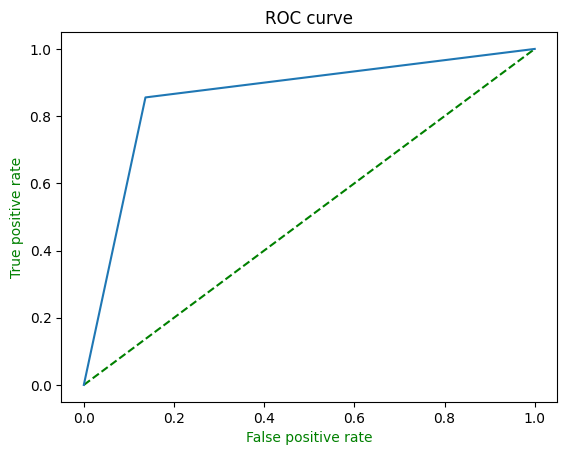

In [135]:
plot_roc_curve(model2,X_test,y_test)

## Logistic Regression:
#### Training accuracy= 0.7626436144667331
#### Testing Accuracy Score= 0.763263371115804

## Random Forest:
#### Training accuracy= 0.9924637038678932
#### Testing Accuracy Score= 0.8591130457268457


In [ ]:
loan_data.to_csv('Bondora Abdulkarim.csv',index=False)